### Visualisations to show the demographic of the data that we have gathered

#### Read in the dataset into a dataframe

In [1]:
import pandas as pd

df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')
df


,Timestamp,How long has it been since your last visit to USS?,Are you Singaporean/PR or Foreigner?,Which age group do you belong to?,Did you visit the theme park with other people?,Choose the top 3 amenities / attractions that are most important to you when you visit the theme park.,Does anyone in your group require special needs access (e.g. wheelchair access)?,Do you accompany children (aged 12 and below) and elders (aged 60 and above) to the theme park?,Does anyone in your group require special needs access (e.g. wheelchair access)?.1,Do you accompany children (aged 12 and below) to the theme park?,...,"On average, how long did you queue to order food/drinks at a F&B outlet in USS?","After placing your order, how long did you wait for your order to arrive at a F&B outlet in USS?",Do you think the quality of food and drinks sold in USS is worth its price?,How much are you willing to spend on food and drinks in USS (per person in your group)?,How would you rate the cleanliness of the restrooms?,"How would you rate the overall cleanliness of the theme park (e.g. litter, odour)?",To what extent does the weather affect your experience?,How did you find your visit?,Would you visit Universal Studios again?,Could you elaborate on why you would / would not visit USS again?
0,2024/10/11 5:05:55 pm GMT+8,Less than 1 month,I am a Singaporean/PR,60 and above,I am visiting with family,Rides;Restroom / Baby Nursing Room;Restaurants...,NaN,NaN,Yes,Yes,...,More than 30 minutes,More than 30 minutes,5.0,$40 - $60,5,5,5,Good,Yes,I love USS
1,2024/10/11 7:04:54 pm GMT+8,More than 5 years,I am a Singaporean/PR,18-25,I am visiting with family,Rides;Shelter;Seasonal attractions (e.g. Horro...,No,None of the above,NaN,NaN,...,Less than 10 minutes,Less than 10 minutes,1.0,Less than $20,4,4,4,Good,No,NaN
2,2024/10/11 10:23:34 pm GMT+8,Less than 5 years,I am a Singaporean/PR,18-25,I am visiting with friend(s),Rides;Restroom / Baby Nursing Room;Water Cooler,No,None of the above,NaN,NaN,...,NaN,NaN,NaN,NaN,2,4,5,Neutral,No,"Not enticing to me, the rides offered were sli..."
3,2024/10/12 12:40:56 am GMT+8,Less than 5 years,I am a Singaporean/PR,18-25,I am visiting with friend(s),Rides;Restroom / Baby Nursing Room;Restaurants...,No,None of the above,NaN,NaN,...,10 to 15 minutes,10 to 15 minutes,2.0,$20 - $40,4,3,5,Good,Yes,"Havent been in a while, good to see what’s new"
4,2024/10/12 1:12:51 am GMT+8,Less than 1 year,I am a Singaporean/PR,18-25,I am visiting with my partner,Rides;Restaurants / Food Stops;Seasonal attrac...,No,None of the above,NaN,NaN,...,NaN,NaN,NaN,NaN,3,4,5,Good,Yes,"I enjoyed my time at USS while on the rides, a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2024/11/02 7:57:42 pm GMT+8,Less than 6 months,I am a foreigner,26-35,I am visiting with friend(s),Rides;Restaurants / Food Stops;Seasonal attrac...,No,None of the above,NaN,NaN,...,NaN,NaN,NaN,NaN,3,4,5,Good,No,"Insufficient shelter, it rained during my visi..."
155,2024/11/02 8:06:30 pm GMT+8,Less than 6 months,I am a foreigner,26-35,I am visiting with family,Rides;Restaurants / Food Stops;Seasonal attrac...,No,None of the above,NaN,NaN,...,15 to 20 minutes,10 to 15 minutes,3.0,$40 - $60,3,3,5,Love it!,Yes,Rides were fun and interesting.
156,2024/11/02 8:10:39 pm GMT+8,Less than 1 year,I am a foreigner,26-35,I am visiting with family,Rides;Restaurants / Food Stops;Seasonal attrac...,No,I accompany children aged 12 and below,NaN,NaN,...,More than 30 minutes,More than 30 minutes,1.0,$80 - $100,4,5,5,Not great,No,Express pass is expensive and we still have to...
157,2024/11/02 8:13:49 pm GMT+8,Less than 1 year,I am a foreigner,26-35,I am visiting with family,Rides;Restaurants / Food Stops;Seasonal attrac...,No,I accompany children aged 12 and below,NaN,NaN,...,20 to 25 minutes,15 to 20 minutes,3.0,$40 - $60,4,4,5,Good,Yes,I did not manage to try all the rides:(


#### Drop all columns except "How long since last visit" column

In [11]:
import pandas as pd
import sqlite3

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an SQLite database (or create one)
conn = sqlite3.connect(':memory:')  # Use ':memory:' to keep it in RAM

# Write the DataFrame to the SQLite database
df.to_sql('full_survey_responses', conn, index=False, if_exists='replace')
# print(df.columns)

# Query the data using SQL
query = """
    SELECT "How long has it been since your last visit to USS?" 
    FROM full_survey_responses
"""
# Execute the query and create a new DataFrame
last_visit = pd.read_sql(query, conn)
print(last_visit)


    How long has it been since your last visit to USS?
0                                    Less than 1 month
1                                    More than 5 years
2                                    Less than 5 years
3                                    Less than 5 years
4                                     Less than 1 year
..                                                 ...
154                                 Less than 6 months
155                                 Less than 6 months
156                                   Less than 1 year
157                                   Less than 1 year
158                                   Less than 1 year

[159 rows x 1 columns]


#### Use a bar graph to show the demographics of the attraction goers, specially to note how relevant is our data based on the recency of the data collected 

/var/folders/p4/vdn5gkqs0213rwj7d5xmylgc0000gn/T/ipykernel_99038/423907319.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Last Visit Duration', y='Count', data=visit_counts, palette='Set3', order=category_order)


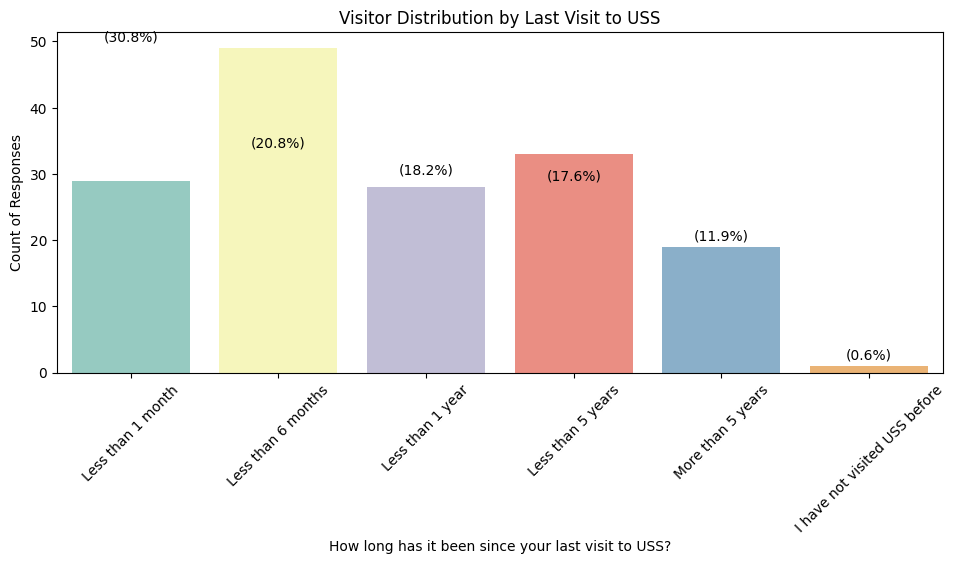

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an SQLite database (or create one)
conn = sqlite3.connect(':memory:')  # Use ':memory:' to keep it in RAM

# Write the DataFrame to the SQLite database
df.to_sql('full_survey_responses', conn, index=False, if_exists='replace')

# Query to select the specific column
query = """
    SELECT "How long has it been since your last visit to USS?" 
    FROM full_survey_responses
"""

# Execute the query and create a new DataFrame
last_visit = pd.read_sql(query, conn)

# Count occurrences of each response
visit_counts = last_visit.value_counts().reset_index()
visit_counts.columns = ['Last Visit Duration', 'Count']

# Calculate the percentage for each category
visit_counts['Percentage'] = (visit_counts['Count'] / visit_counts['Count'].sum()) * 100

# Define the desired order for the categories
category_order = [
    "Less than 1 month", 
    "Less than 6 months", 
    "Less than 1 year", 
    "Less than 5 years", 
    "More than 5 years", 
    "I have not visited USS before"
]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Last Visit Duration', y='Count', data=visit_counts, palette='Set3', order=category_order)
plt.title('Visitor Distribution by Last Visit to USS')
plt.xlabel('How long has it been since your last visit to USS?')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Add count and percentage labels on top of each bar
for index, row in visit_counts.iterrows():
    plt.text(
        index, 
        row['Count'] + 1,  # Adjust position slightly above the bar
        f"({row['Percentage']:.1f}%)", # Add % annotation to the graph
        # f"{row['Count']} ({row['Percentage']:.1f}%)", 
        color='black', 
        ha='center'
    )

plt.tight_layout(pad=2.0)  # Adjust layout to make room for labels
plt.show()

### Pie chart

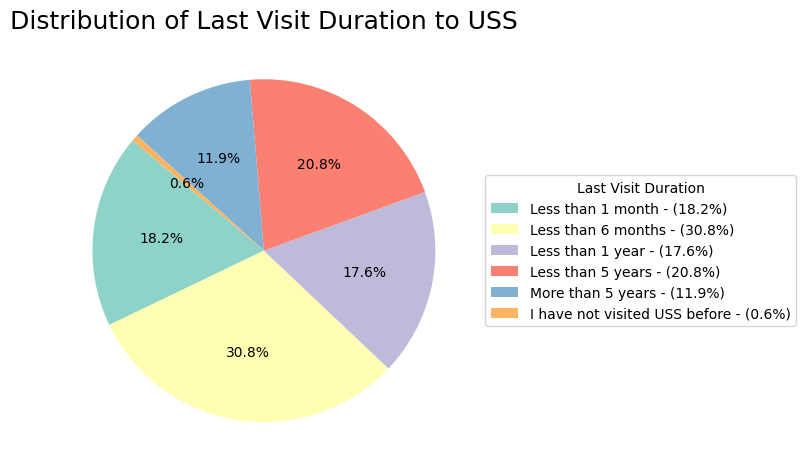

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an SQLite database (or create one)
conn = sqlite3.connect(':memory:')  # Use ':memory:' to keep it in RAM

# Write the DataFrame to the SQLite database
df.to_sql('full_survey_responses', conn, index=False, if_exists='replace')

# Query to select the specific column
query = """
    SELECT "How long has it been since your last visit to USS?" 
    FROM full_survey_responses
"""

# Execute the query and create a new DataFrame
last_visit = pd.read_sql(query, conn)

# Count occurrences of each response
visit_counts = last_visit.value_counts().reset_index()
visit_counts.columns = ['Last Visit Duration', 'Count']

# Define the desired order for the categories
category_order = [
    "Less than 1 month", 
    "Less than 6 months", 
    "Less than 1 year", 
    "Less than 5 years", 
    "More than 5 years", 
    "I have not visited USS before"
]

# Ensure the data is ordered according to the specified category order
visit_counts['Last Visit Duration'] = pd.Categorical(visit_counts['Last Visit Duration'], categories=category_order, ordered=True)
visit_counts = visit_counts.sort_values('Last Visit Duration')

# Calculate the percentage for each category
visit_counts['Percentage'] = (visit_counts['Count'] / visit_counts['Count'].sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    visit_counts['Count'],
    autopct='%1.1f%%',  # Show only percentage on each slice
    startangle=140,  # Rotate to improve aesthetics
    colors=sns.color_palette("Set3", len(visit_counts))  # Use a color palette from Seaborn
)

# Create a legend that includes both category, count, and percentage
legend_labels = [
    f"{row['Last Visit Duration']} - ({row['Percentage']:.1f}%)"
    for _, row in visit_counts.iterrows()
]

plt.legend(wedges, legend_labels, title="Last Visit Duration", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Last Visit Duration to USS', fontsize=18)
plt.tight_layout(pad=2.0)
plt.show()

#### Shows the demographics of attraction goers, specially where they come from (nationality) 

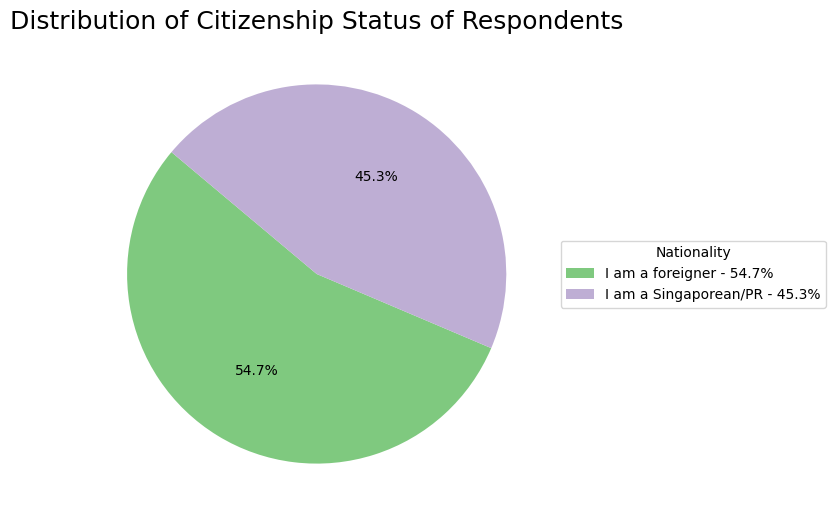

/var/folders/p4/vdn5gkqs0213rwj7d5xmylgc0000gn/T/ipykernel_58625/1711521935.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


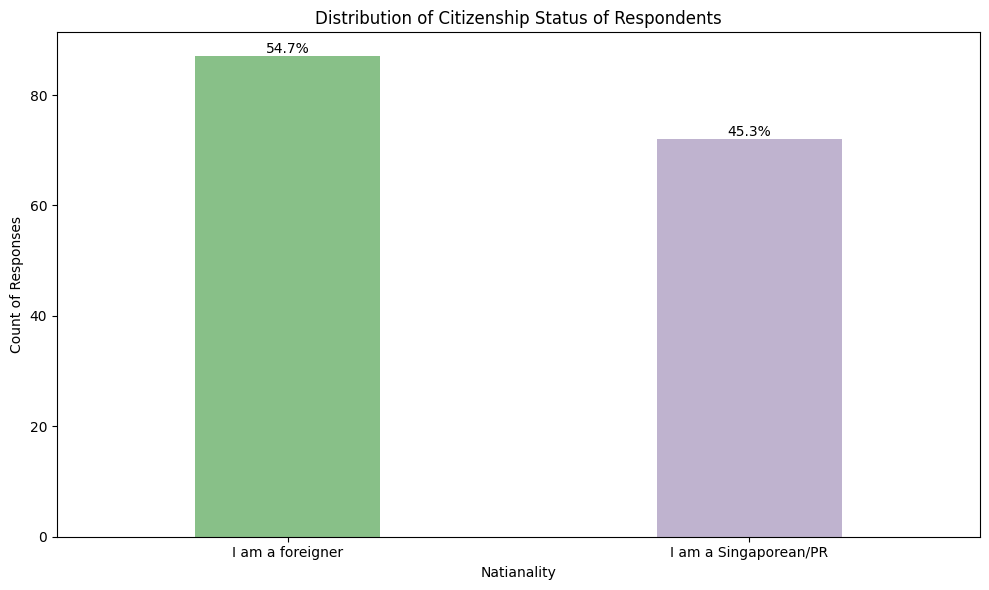

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an SQLite database (or create one)
conn = sqlite3.connect(':memory:')  # Use ':memory:' to keep it in RAM

# Write the DataFrame to the SQLite database
df.to_sql('full_survey_responses', conn, index=False, if_exists='replace')

# Query to select the specific column
query = """
    SELECT "Are you Singaporean/PR or Foreigner?" 
    FROM full_survey_responses
"""

# Execute the query and create a new DataFrame
nationality_data = pd.read_sql(query, conn)

# Count occurrences of each response
nationality_counts = nationality_data.value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Count']

# Calculate the percentage for each category
nationality_counts['Percentage'] = (nationality_counts['Count'] / nationality_counts['Count'].sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))

wedges, texts, autotexts = plt.pie(
    nationality_counts['Count'],
    autopct='%1.1f%%',  # Show only percentage on each slice
    startangle=140,  # Rotate to improve aesthetics
    colors=sns.color_palette("Accent", len(nationality_counts))  # Use a color palette from Seaborn
)

# Create a legend that includes both category, count, and percentage
legend_labels = [
    f"{row['Nationality']} - {row['Percentage']:.1f}%"
    for _, row in nationality_counts.iterrows()
]

plt.legend(wedges, legend_labels, title="Nationality", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Citizenship Status of Respondents', fontsize=18)
plt.tight_layout(pad=2.0)
plt.show()

colors = sns.color_palette("Accent", len(nationality_counts))
                            
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Nationality', 
    y='Count', 
    data=nationality_counts, 
    palette= colors,
    width = 0.4
)

# Add counts and percentages on top of each bar
for index, row in nationality_counts.iterrows():
    percentage = (row['Count'] / nationality_counts['Count'].sum()) * 100
    plt.text(index, row['Count'], f"{percentage:.1f}%", ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Distribution of Citizenship Status of Respondents')
plt.xlabel('Natianality')
plt.ylabel('Count of Responses')
# plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for readability
plt.show()

#### Shows the demographics of who they go to the attraction with

/var/folders/p4/vdn5gkqs0213rwj7d5xmylgc0000gn/T/ipykernel_82850/2049086320.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


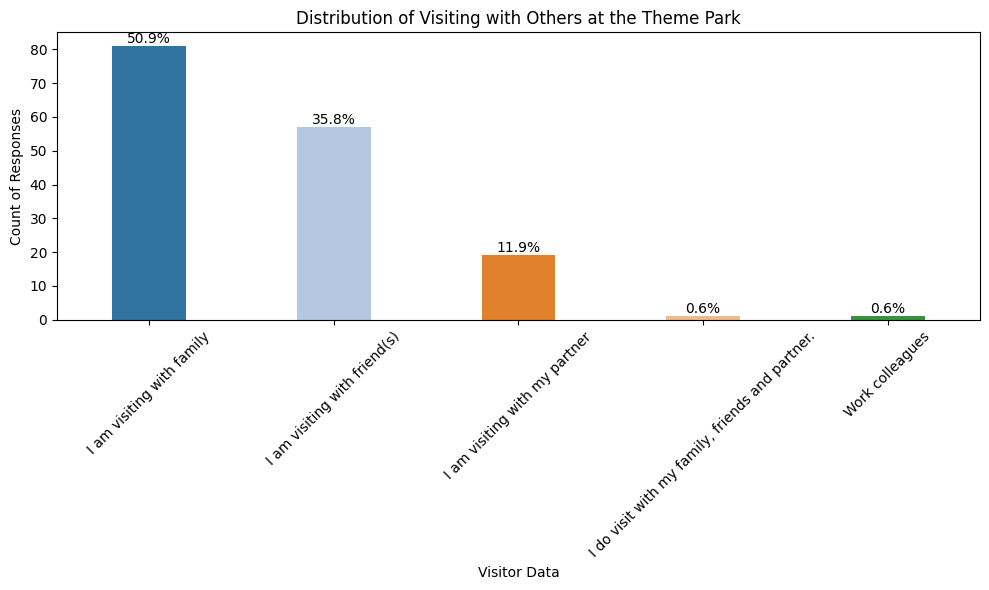

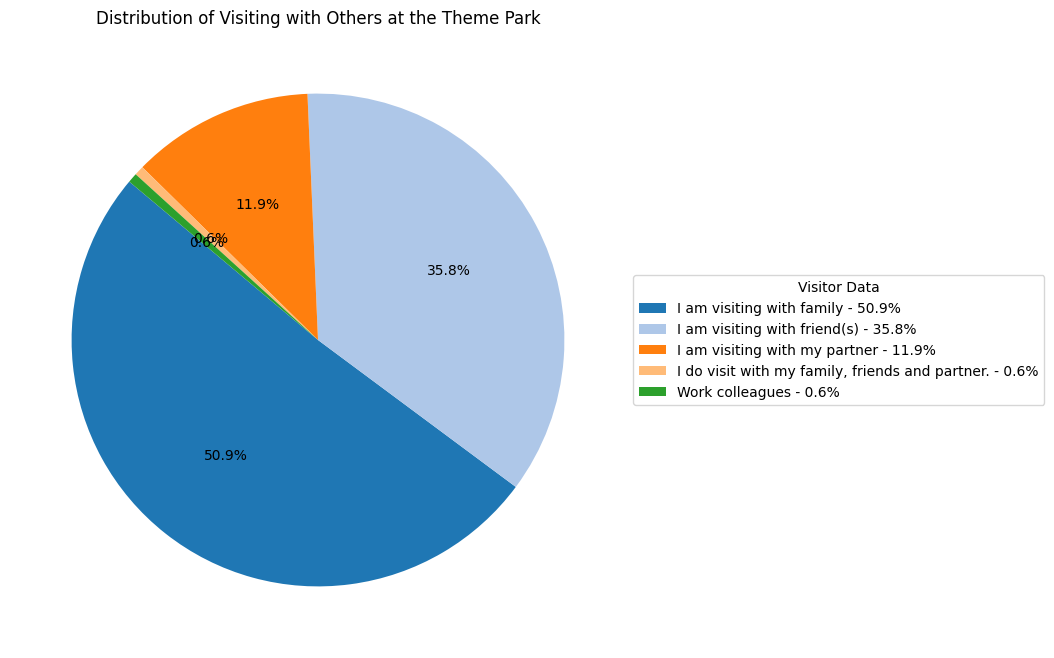

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an SQLite database (or create one)
conn = sqlite3.connect(':memory:')  # Use ':memory:' to keep it in RAM

# Write the DataFrame to the SQLite database
df.to_sql('full_survey_responses', conn, index=False, if_exists='replace')

# Query to select the specific column
query = """
    SELECT "Did you visit the theme park with other people?" 
    FROM full_survey_responses
"""

# Execute the query and create a new DataFrame
visit_data = pd.read_sql(query, conn)

# Count occurrences of each response
visit_counts = visit_data.value_counts().reset_index()
visit_counts.columns = ['Visitor Data', 'Count']

# Calculate the percentage for each category
visit_counts['Percentage'] = (visit_counts['Count'] / visit_counts['Count'].sum()) * 100

# Define a color palette
colors = sns.color_palette("tab20", len(visit_counts))
                  
# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Visitor Data', 
    y='Count', 
    data=visit_counts, 
    palette= colors,
    width = 0.4
)

# Add counts and percentages on top of each bar
for index, row in visit_counts.iterrows():
    plt.text(index, row['Count'], f"{row['Percentage']:.1f}%", ha='center', va='bottom', fontsize=10)

# Set title and labels
plt.title('Distribution of Visiting with Others at the Theme Park')
plt.xlabel('Visitor Data')
plt.ylabel('Count of Responses')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for readability
plt.show()

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    visit_counts['Count'],
    autopct='%1.1f%%',  # Show percentage on each slice
    startangle=140,  # Rotate for better aesthetics
    colors=colors
)

# Create a legend that includes both category, count, and percentage
legend_labels = [
    f"{row['Visitor Data']} - {row['Percentage']:.1f}%"
    for _, row in visit_counts.iterrows()
]

plt.legend(wedges, legend_labels, title="Visitor Data", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Visiting with Others at the Theme Park')
plt.show()

#### If respondent chose "I do visit with my family, friends and partner", add 1 to the count of each

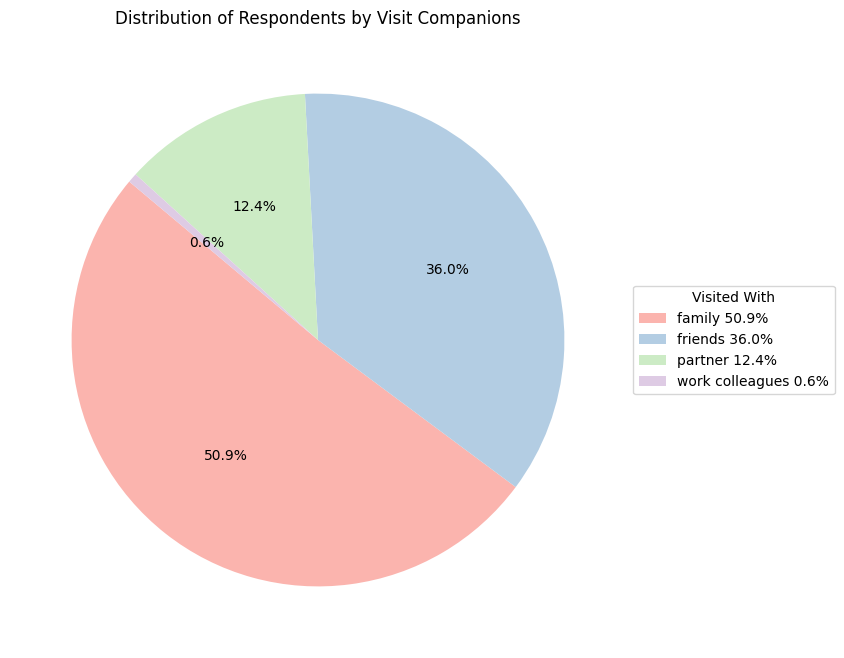

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an SQLite database (or create one)
conn = sqlite3.connect(':memory:')  # Use ':memory:' to keep it in RAM

# Write the DataFrame to the SQLite database
df.to_sql('full_survey_responses', conn, index=False, if_exists='replace')

# Query to select the "Did you visit the theme park with other people?" column
query = """
    SELECT "Did you visit the theme park with other people?"
    FROM full_survey_responses
"""

# Execute the query and create a new DataFrame
visit_data = pd.read_sql(query, conn)
# print(visit_data)

# Define a mapping for each option
mapping = {
    "family": 0,
    "friends": 0,
    "partner": 0,
    "work colleagues": 0
}

# Count each response, and for option 4 ("family, friends, partner"),
# increment each individual category (family, friends, partner)
for response in visit_data["Did you visit the theme park with other people?"]:
    if response == "I am visiting with family":
        mapping["family"] += 1
    elif response == "I am visiting with friend(s)":
        mapping["friends"] += 1
    elif response == "I am visiting with my partner":
        mapping["partner"] += 1
    elif response == "I do visit with my family, friends and partner.":
        mapping["family"] += 1
        mapping["friends"] += 1
        mapping["partner"] += 1
    elif response == "Work colleagues":
        mapping["work colleagues"] += 1

# Convert the mapping dictionary into a DataFrame
visit_counts = pd.DataFrame(list(mapping.items()), columns=['Visited With', 'Count'])

# Calculate the percentage for each category
visit_counts['Percentage'] = (visit_counts['Count'] / visit_counts['Count'].sum()) * 100

# Define a color palette
colors = sns.color_palette("Pastel1", len(visit_counts))

# Create the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    visit_counts['Count'],
    autopct='%1.1f%%',  # Show percentage on each slice
    startangle=140,  # Rotate for better aesthetics
    colors=colors
)

# Create a legend that includes both category, count, and percentage
legend_labels = [
    f"{row['Visited With']} {row['Percentage']:.1f}%"
    for _, row in visit_counts.iterrows()
]

plt.legend(wedges, legend_labels, title="Visited With", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribution of Respondents by Visit Companions')
plt.show()


#### Finding the demographics of the top 3 amenities of those who visit the attraction

Finding out what is the top amenity chosen by attraction goers that is most important to them.

    before_first_semicolon
0                    Rides
1                    Rides
2                    Rides
3                    Rides
4                    Rides
..                     ...
154                  Rides
155                  Rides
156                  Rides
157                  Rides
158                  Rides

[159 rows x 1 columns]


/var/folders/p4/vdn5gkqs0213rwj7d5xmylgc0000gn/T/ipykernel_58625/3330387822.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


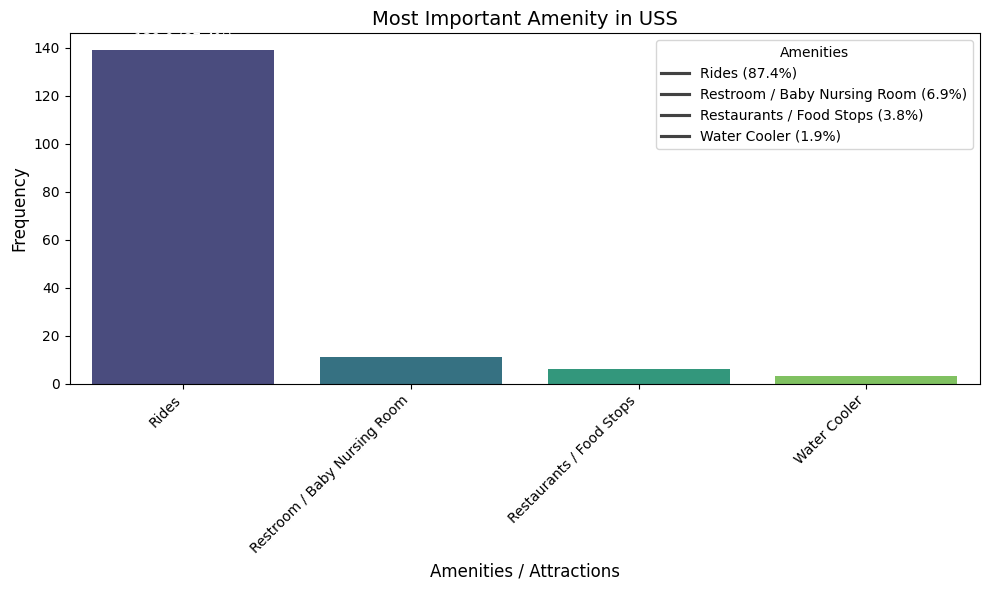

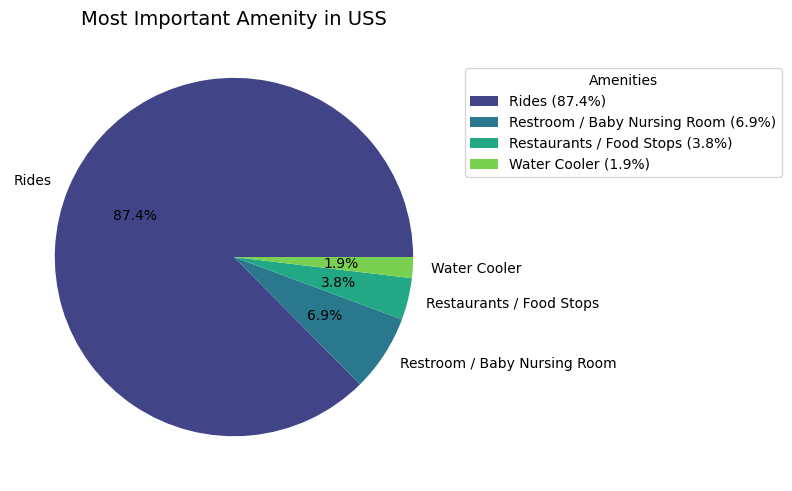

In [194]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to SQLite database (in-memory database)
conn = sqlite3.connect(':memory:')

# Write the DataFrame to the SQLite database
df.to_sql('full_survey_responses', conn, index=False, if_exists='replace')

# SQL query to extract everything before the first ";" from the column
sql_query = """
SELECT 
    TRIM(SUBSTR("Choose the top 3 amenities / attractions that are most important to you when you visit the theme park.",
                1, 
                INSTR("Choose the top 3 amenities / attractions that are most important to you when you visit the theme park.", ';') - 1)) AS before_first_semicolon
FROM full_survey_responses
WHERE "Choose the top 3 amenities / attractions that are most important to you when you visit the theme park." IS NOT NULL
"""

# Execute the SQL query and load the results into a new DataFrame
before_semicolon_df = pd.read_sql_query(sql_query, conn)

# Display the resulting DataFrame
print(before_semicolon_df)  # Display the rows for verification

# Close the SQLite connection
conn.close()

# Get the value counts for the bar chart and pie chart
value_counts = before_semicolon_df['before_first_semicolon'].value_counts()

# Bar Graph with percentage labels and legend
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Add percentage labels to each bar
for p in bar_plot.patches:
    height = p.get_height()
    percentage = (height / value_counts.sum()) * 100
    bar_plot.annotate(f'{height} ({percentage:.1f}%)', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      fontsize=10, color='white', 
                      xytext=(0, 8), textcoords='offset points')

# Add a title and labels
plt.title("Most Important Amenity in USS", fontsize=14)
plt.xlabel("Amenities / Attractions", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Create a custom legend with percentages
legend_labels = [f'{amenity} ({(count / value_counts.sum()) * 100:.1f}%)' for amenity, count in value_counts.items()]
plt.legend(legend_labels, title="Amenities", loc="upper right")
plt.show()

# Pie Chart with percentage and legend
plt.figure(figsize=(8, 8))

# Calculate percentages and plot the pie chart
percentages = value_counts / value_counts.sum() * 100
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(value_counts)))

# Title for the pie chart
plt.title("Most Important Amenity in USS", fontsize=14)

# Create a custom legend for the pie chart with percentages
pie_legend_labels = [f'{category} ({percentage:.1f}%)' for category, percentage in zip(value_counts.index, percentages)]
plt.legend(pie_legend_labels, title="Amenities", loc="center left", bbox_to_anchor=(1, 0.8))

plt.tight_layout()
plt.show()


Finding out what is the top 2 amenity chosen by attraction goers that is most important to them.

          before_second_semicolon
0    Restroom / Baby Nursing Room
1                         Shelter
2    Restroom / Baby Nursing Room
3    Restroom / Baby Nursing Room
4        Restaurants / Food Stops
..                            ...
154      Restaurants / Food Stops
155      Restaurants / Food Stops
156      Restaurants / Food Stops
157      Restaurants / Food Stops
158      Restaurants / Food Stops

[159 rows x 1 columns]


/var/folders/p4/vdn5gkqs0213rwj7d5xmylgc0000gn/T/ipykernel_58625/3120649826.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


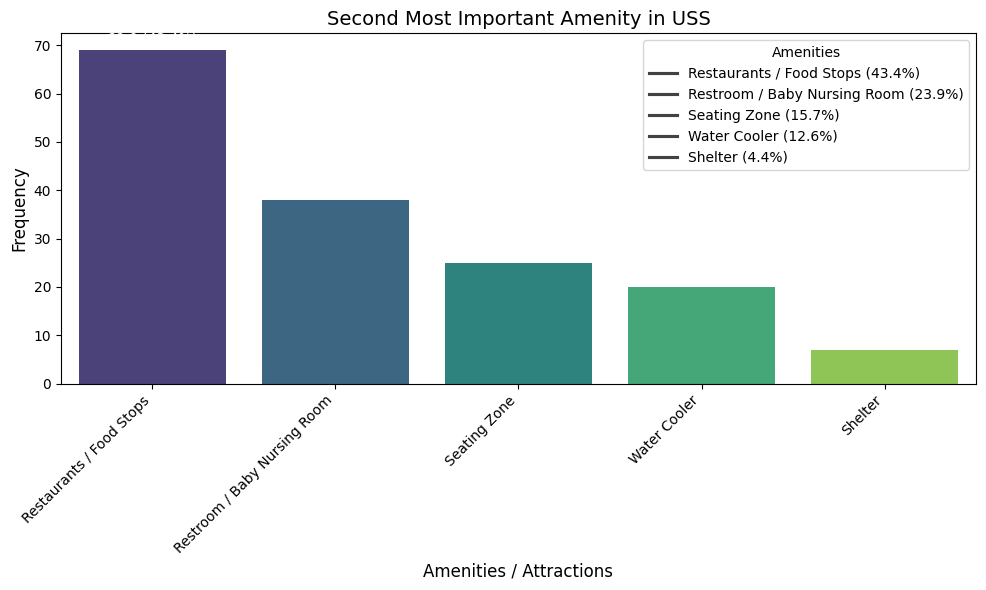

/var/folders/p4/vdn5gkqs0213rwj7d5xmylgc0000gn/T/ipykernel_58625/3120649826.py:92: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


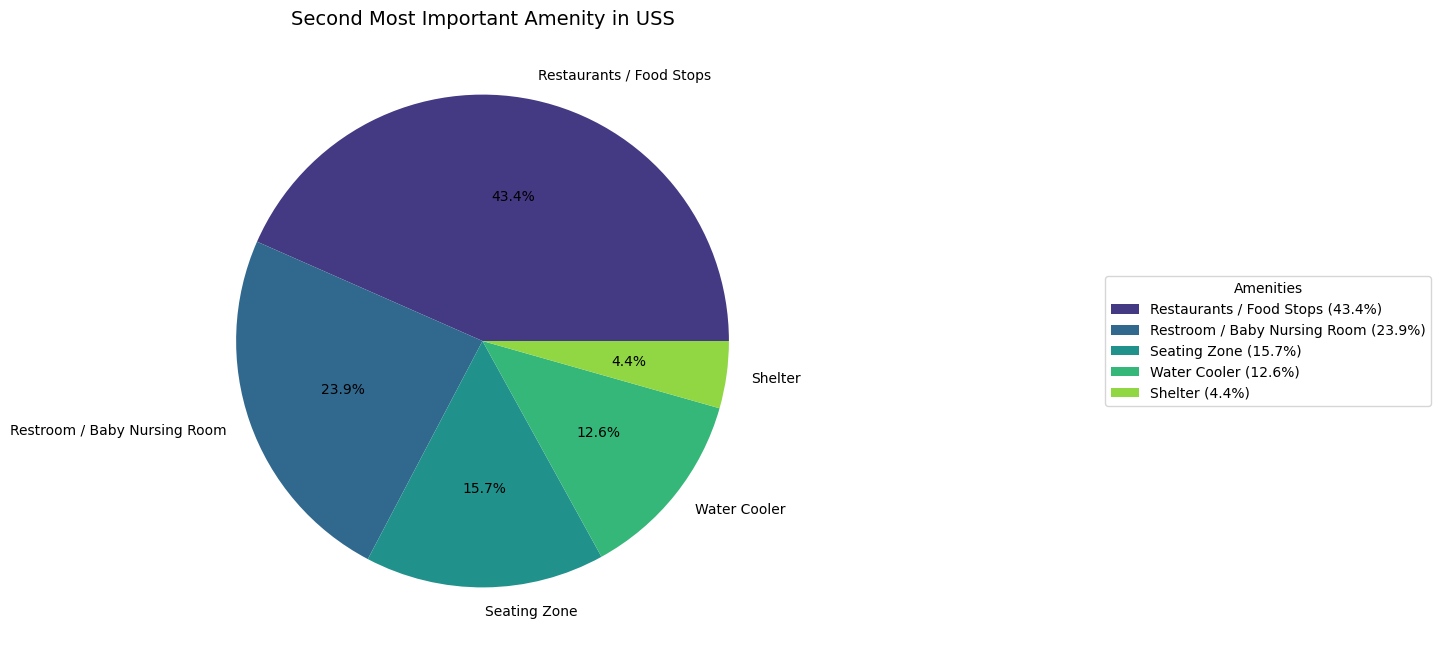

In [193]:
import pandas as pd
import sqlite3

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to SQLite database (in-memory database)
conn = sqlite3.connect(':memory:')

# Write the DataFrame to the SQLite database
df.to_sql('full_survey_responses', conn, index=False, if_exists='replace')

# SQL query to extract everything after the first ";" from the column
sql_query_first = """
SELECT 
    TRIM(SUBSTR("Choose the top 3 amenities / attractions that are most important to you when you visit the theme park.",
                INSTR("Choose the top 3 amenities / attractions that are most important to you when you visit the theme park.", ';') + 1)) AS after_first_semicolon
FROM full_survey_responses
WHERE "Choose the top 3 amenities / attractions that are most important to you when you visit the theme park." IS NOT NULL
"""

# Execute the SQL query and load the results into a new DataFrame
after_semicolon_df = pd.read_sql_query(sql_query_first, conn)

# Now, create another SQL query to extract everything before the second ";" in the `after_first_semicolon` column
sql_query_second = """
SELECT 
    TRIM(SUBSTR(after_first_semicolon,
                1,
                INSTR(after_first_semicolon, ';') - 1)) AS before_second_semicolon
FROM (
    SELECT TRIM(SUBSTR("Choose the top 3 amenities / attractions that are most important to you when you visit the theme park.",
                INSTR("Choose the top 3 amenities / attractions that are most important to you when you visit the theme park.", ';') + 1)) AS after_first_semicolon
    FROM full_survey_responses
    WHERE "Choose the top 3 amenities / attractions that are most important to you when you visit the theme park." IS NOT NULL
) AS temp_df
WHERE after_first_semicolon IS NOT NULL
"""

# Execute the SQL query and load the results into a new DataFrame
before_second_semicolon_df = pd.read_sql_query(sql_query_second, conn)

# Display the resulting DataFrame
print(before_second_semicolon_df)

# Close the connection
conn.close()

# Get the value counts for the bar chart and pie chart
value_counts = before_second_semicolon_df['before_second_semicolon'].value_counts()

# Bar Graph with percentage labels and legend
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Add percentage labels to each bar
for p in bar_plot.patches:
    height = p.get_height()
    percentage = (height / value_counts.sum()) * 100
    bar_plot.annotate(f'{height} ({percentage:.1f}%)', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      fontsize=10, color='white', 
                      xytext=(0, 8), textcoords='offset points')

# Add a title and labels
plt.title("Second Most Important Amenity in USS", fontsize=14)
plt.xlabel("Amenities / Attractions", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Create a custom legend with percentages
legend_labels = [f'{amenity} ({(count / value_counts.sum()) * 100:.1f}%)' for amenity, count in value_counts.items()]
plt.legend(legend_labels, title="Amenities", loc="upper right")
plt.show()

# Pie Chart with percentage and legend
plt.figure(figsize=(8, 8))

# Calculate percentages and plot the pie chart
percentages = value_counts / value_counts.sum() * 100
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(value_counts)))

# Title for the pie chart
plt.title("Second Most Important Amenity in USS", fontsize=14)

# Create a custom legend for the pie chart with percentages
pie_legend_labels = [f'{category} ({percentage:.1f}%)' for category, percentage in zip(value_counts.index, percentages)]
plt.legend(pie_legend_labels, title="Amenities", loc="center left", bbox_to_anchor=(1.5, 0.5))

plt.tight_layout()
plt.show()



Finding out what is the top 3 amenity chosen by attraction goers that is most important to them.

                                after_second_semicolon
0                             Restaurants / Food Stops
1    Seasonal attractions (e.g. Horror Night, Parad...
2                                         Water Cooler
3                             Restaurants / Food Stops
4    Seasonal attractions (e.g. Horror Night, Parad...
..                                                 ...
154  Seasonal attractions (e.g. Horror Night, Parad...
155  Seasonal attractions (e.g. Horror Night, Parad...
156  Seasonal attractions (e.g. Horror Night, Parad...
157  Seasonal attractions (e.g. Horror Night, Parad...
158  Seasonal attractions (e.g. Horror Night, Parad...

[159 rows x 1 columns]


/var/folders/p4/vdn5gkqs0213rwj7d5xmylgc0000gn/T/ipykernel_58625/1147738834.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")


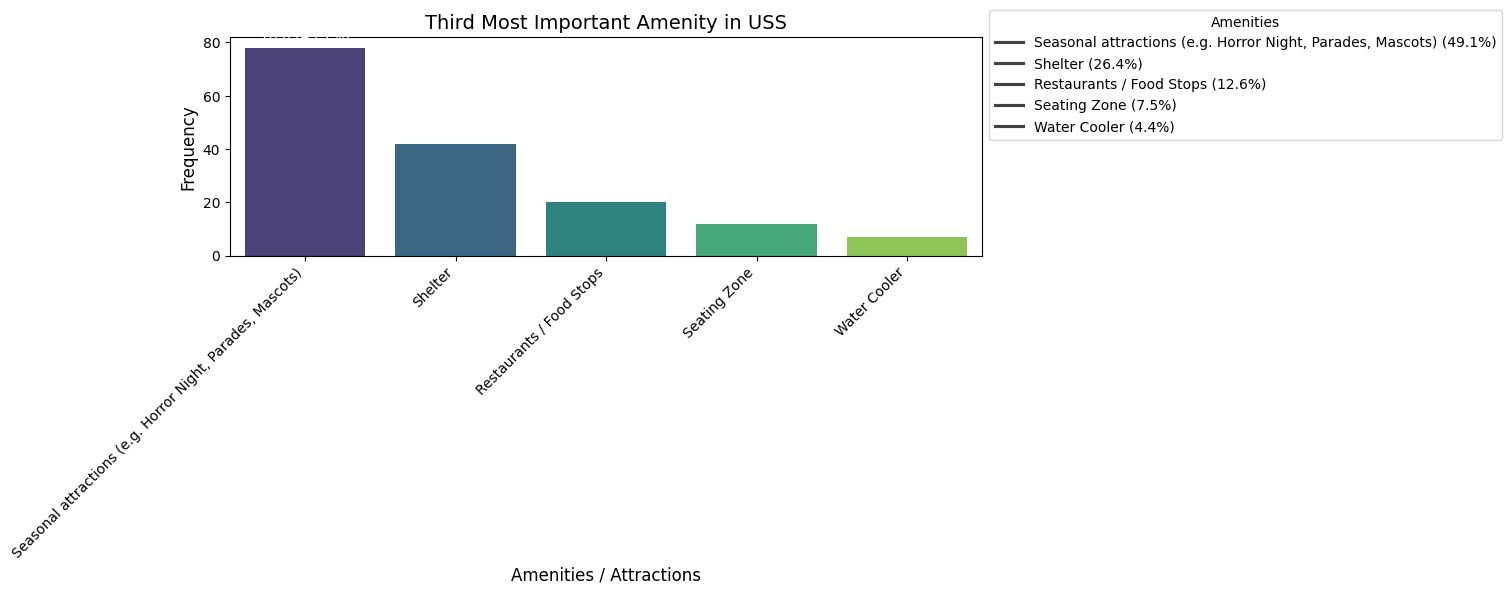

/var/folders/p4/vdn5gkqs0213rwj7d5xmylgc0000gn/T/ipykernel_58625/1147738834.py:92: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


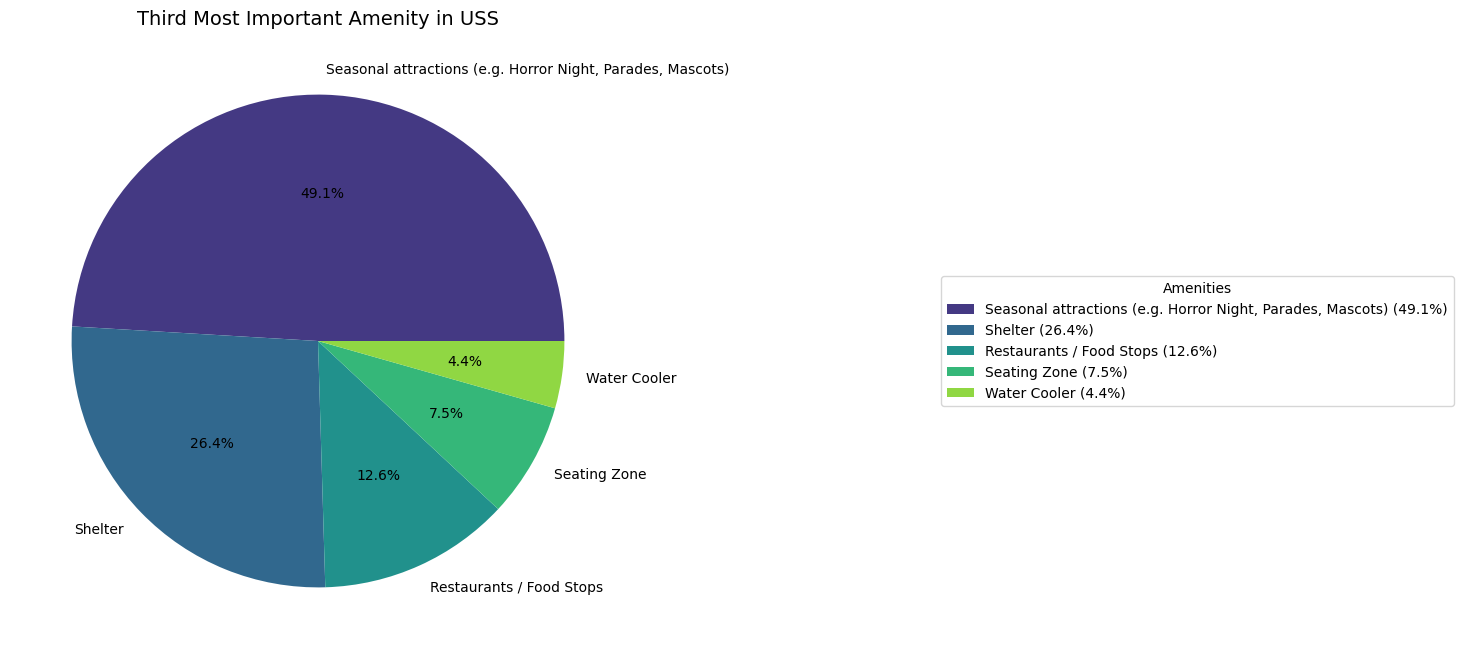

In [192]:
import pandas as pd
import sqlite3

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to SQLite database (in-memory database)
conn = sqlite3.connect(':memory:')

# Write the DataFrame to the SQLite database
df.to_sql('full_survey_responses', conn, index=False, if_exists='replace')

# SQL query to extract everything after the first ";" from the column
sql_query_first = """
SELECT 
    TRIM(SUBSTR("Choose the top 3 amenities / attractions that are most important to you when you visit the theme park.",
                INSTR("Choose the top 3 amenities / attractions that are most important to you when you visit the theme park.", ';') + 1)) AS after_first_semicolon
FROM full_survey_responses
WHERE "Choose the top 3 amenities / attractions that are most important to you when you visit the theme park." IS NOT NULL
"""

# Execute the SQL query and load the results into a new DataFrame
after_semicolon_df = pd.read_sql_query(sql_query_first, conn)
# print(after_semicolon_df)

# Write the 'after_semicolon_df' DataFrame to a new table in the SQLite database
after_semicolon_df.to_sql('after_semicolon_df', conn, index=False, if_exists='replace')


# SQL query to extract everything after the second ";" from the "after_first_semicolon" column
sql_query_second = """
SELECT 
    TRIM(SUBSTR("after_first_semicolon", INSTR("after_first_semicolon", ';') + 1)) AS after_second_semicolon
FROM 
    after_semicolon_df
WHERE 
    "after_first_semicolon" IS NOT NULL;
"""

# Execute the SQL query to extract the part after the second semicolon
after_second_semicolon_df = pd.read_sql_query(sql_query_second, conn)

# Display the resulting DataFrame
print(after_second_semicolon_df)

# Close the connection
conn.close()

# Get the value counts for the bar chart and pie chart
value_counts = after_second_semicolon_df['after_second_semicolon'].value_counts()

# Bar Graph with percentage labels and legend
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Add percentage labels to each bar
for p in bar_plot.patches:
    height = p.get_height()
    percentage = (height / value_counts.sum()) * 100
    bar_plot.annotate(f'{height} ({percentage:.1f}%)', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      fontsize=10, color='white', 
                      xytext=(0, 8), textcoords='offset points')

# Add a title and labels
plt.title("Third Most Important Amenity in USS", fontsize=14)
plt.xlabel("Amenities / Attractions", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Create a custom legend with percentages
legend_labels = [f'{amenity} ({(count / value_counts.sum()) * 100:.1f}%)' for amenity, count in value_counts.items()]
plt.legend(legend_labels, title="Amenities", loc="lower left", bbox_to_anchor=(1, 0.5))
plt.show()

# Pie Chart with percentage and legend
plt.figure(figsize=(8, 8))

# Calculate percentages and plot the pie chart
percentages = value_counts / value_counts.sum() * 100
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(value_counts)))

# Title for the pie chart
plt.title("Third Most Important Amenity in USS", fontsize=14)

# Create a custom legend for the pie chart with percentages
pie_legend_labels = [f'{category} ({percentage:.1f}%)' for category, percentage in zip(value_counts.index, percentages)]
plt.legend(pie_legend_labels, title="Amenities", loc="center left", bbox_to_anchor=(1.5, 0.5))

plt.tight_layout()
plt.show()


#### Take columns K to Q.

1. Update missing entries to "Did not visit."
2. Create individual pie charts for each attraction’s ranking.
3. Summary visualization showing the overall ranking distribution

In [123]:
#1

import pandas as pd
import sqlite3

# Load your Excel file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')
# print(df.columns)

# List of columns to update
attraction_columns = [
    "Rank the following theme park zones based on the order in which you visited them. [New York]",
    "Rank the following theme park zones based on the order in which you visited them. [Hollywood]",
    "Rank the following theme park zones based on the order in which you visited them. [Sci-Fi City]",
    "Rank the following theme park zones based on the order in which you visited them. [Madagascar]",
    "Rank the following theme park zones based on the order in which you visited them. [Far Far Away]",
    "Rank the following theme park zones based on the order in which you visited them. [The Lost World]"
]

# Fill NaN values with "Did not visit"
df[attraction_columns] = df[attraction_columns].fillna("Did not visit")

# Connect to an in-memory SQLite database
conn = sqlite3.connect(":memory:")

# Save to SQL database
df.to_sql("theme_park_visits", conn, index=False, if_exists="replace")


159

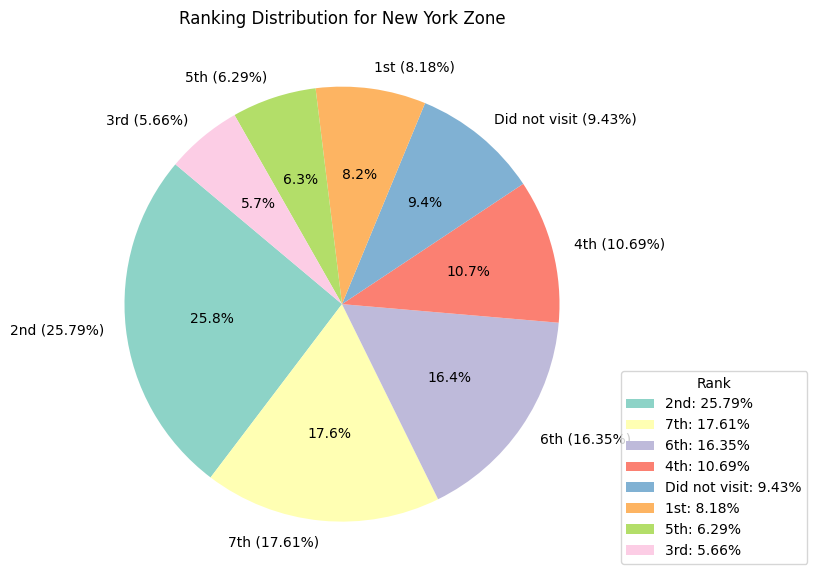

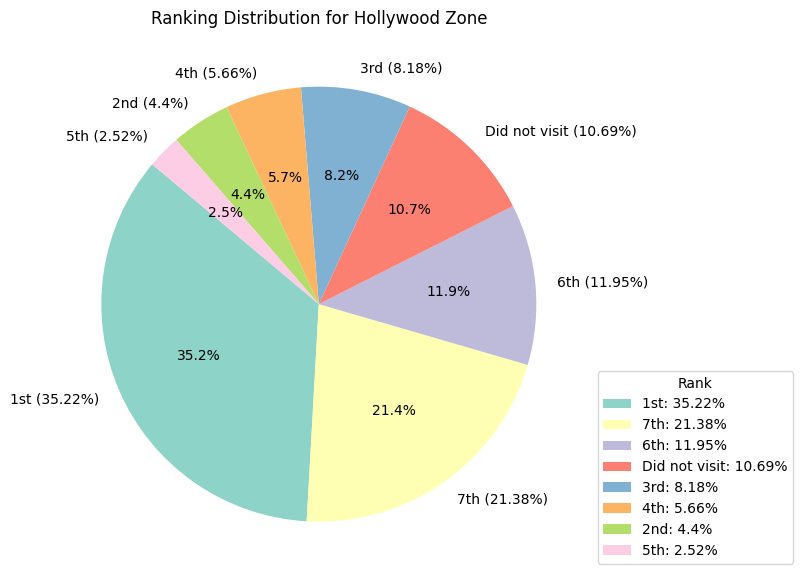

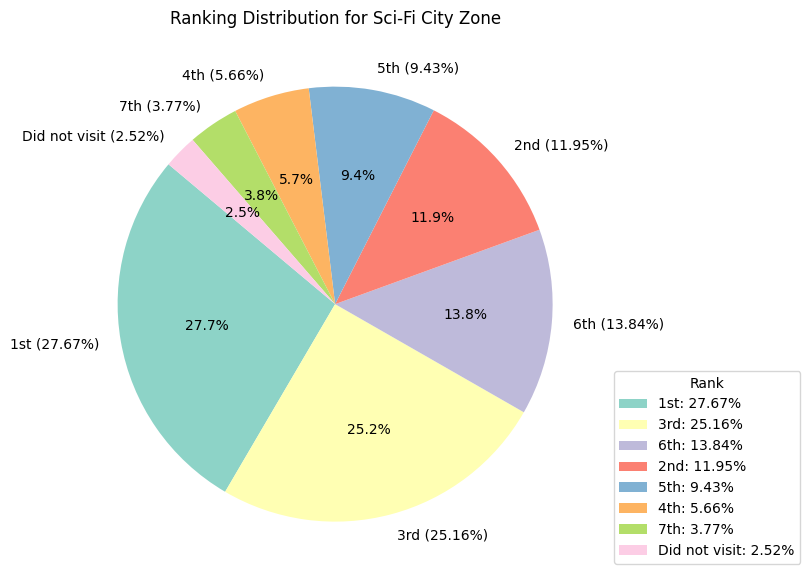

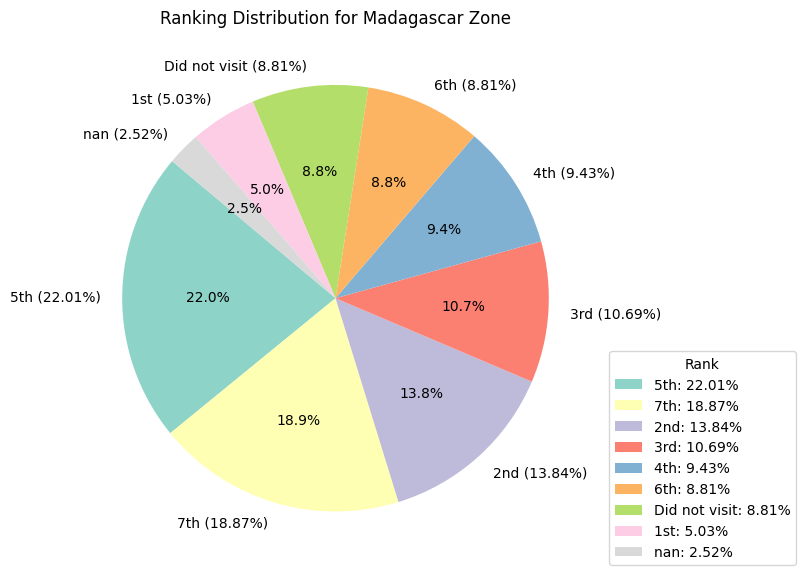

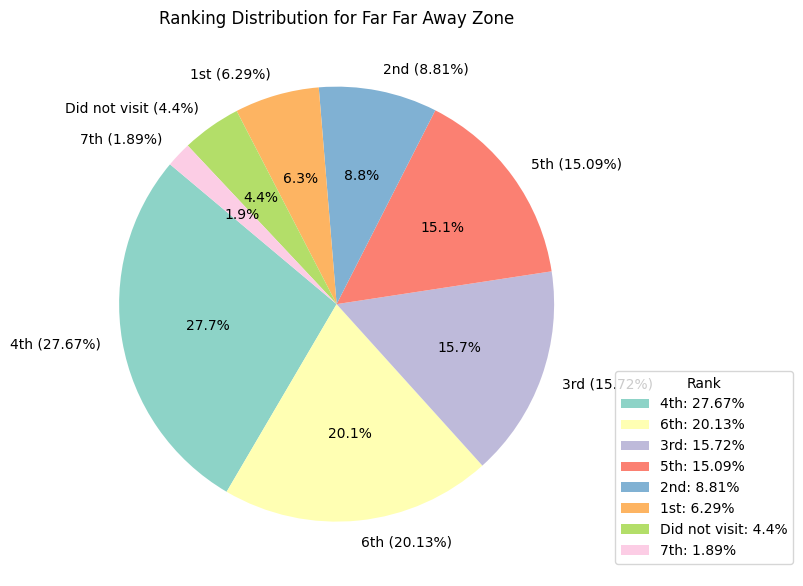

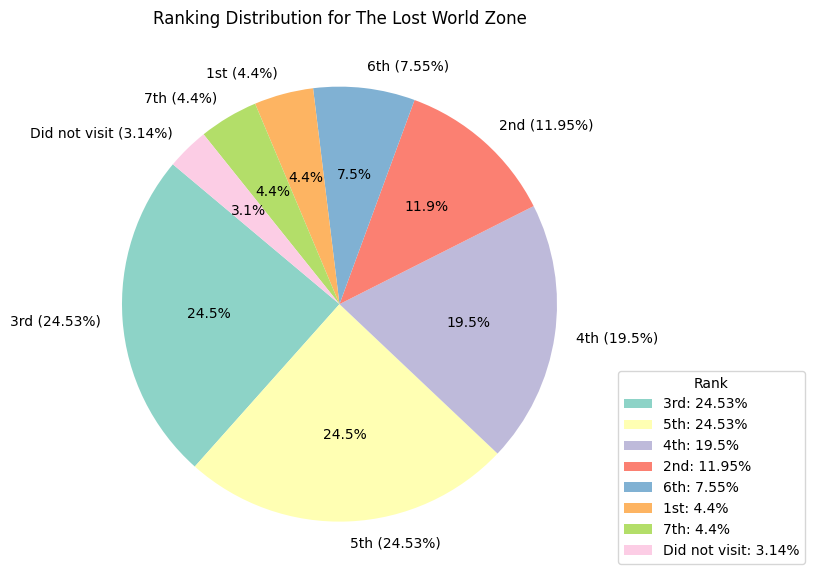

In [195]:
# 2.
import matplotlib.pyplot as plt

# List of the relevant columns for each attraction zone
attraction_columns = [
    "Rank the following theme park zones based on the order in which you visited them. [New York]",
    "Rank the following theme park zones based on the order in which you visited them. [Hollywood]",
    "Rank the following theme park zones based on the order in which you visited them. [Sci-Fi City]",
    "Rank the following theme park zones based on the order in which you visited them. [Madagascar]",
    "Rank the following theme park zones based on the order in which you visited them. [Far Far Away]",
    "Rank the following theme park zones based on the order in which you visited them. [The Lost World]"
]

# Loop through each column to create individual pie charts
for column in attraction_columns:
    # Count occurrences of each rank for the current attraction
    rank_counts = df[column].value_counts(dropna=False)  # Dropna=False to include any "Did not visit" entries
    percentages = round((rank_counts / rank_counts.sum()) * 100, 2)
    
    # Plot the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(
        rank_counts, 
        labels=[f"{index} ({percent}%)" for index, percent in zip(rank_counts.index, percentages)],
        autopct='%1.1f%%', 
        startangle=140,
        colors=plt.cm.Set3.colors  # Use a vibrant colormap like tab20 for bright colors
    )
    plt.title(f"Ranking Distribution for {column.split('[')[1].split(']')[0]} Zone")  # Extracts the zone name for the title
    
    # Place the legend outside the plot area
    plt.legend(
        title="Rank", 
        loc="center left", 
        bbox_to_anchor=(1, 0.2),  # Position to the right of the pie chart
        labels=[f"{index}: {percent}%" for index, count, percent in zip(rank_counts.index, rank_counts, percentages)]
    )
    
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()


#### changing the above code such that each colour represents a specific rank -- to standardize across all pie charts

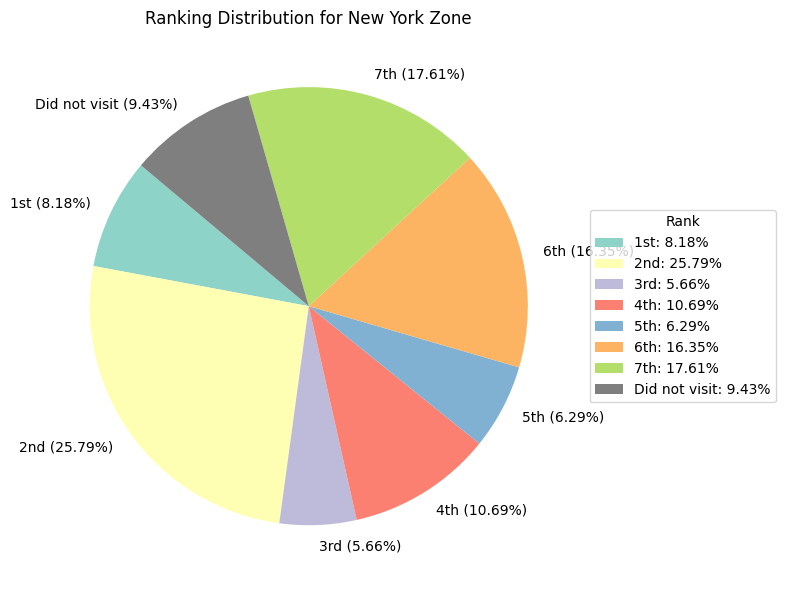

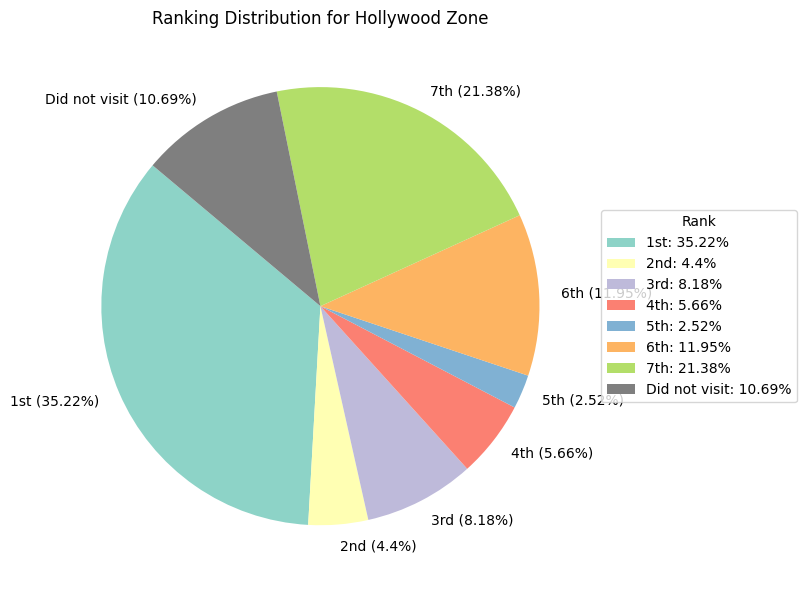

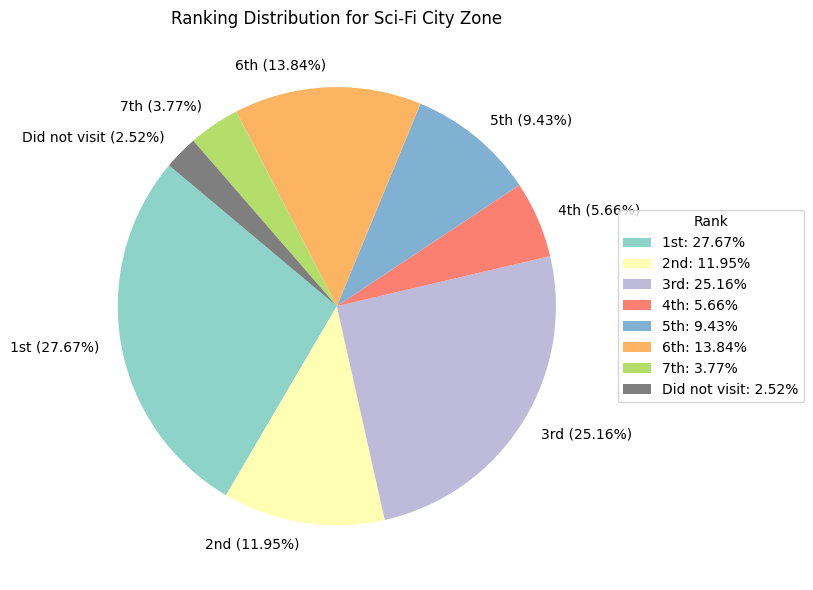

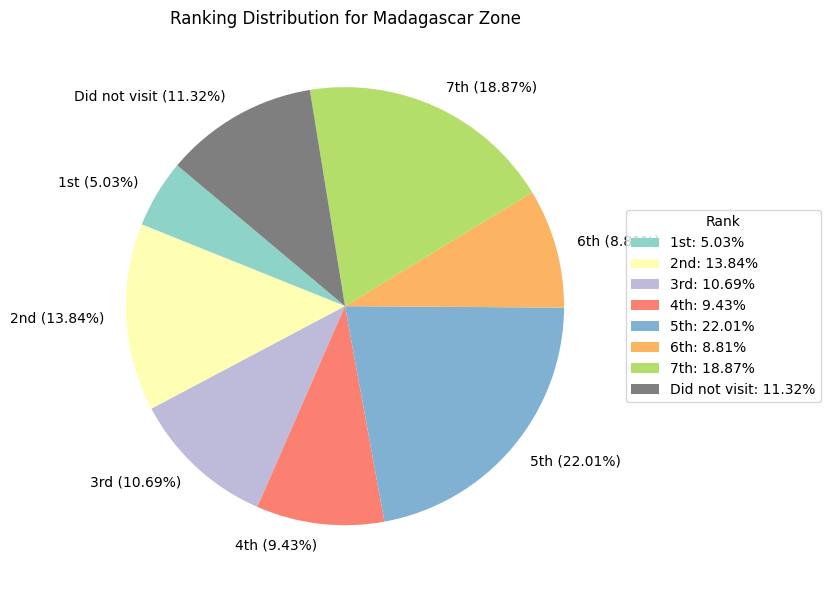

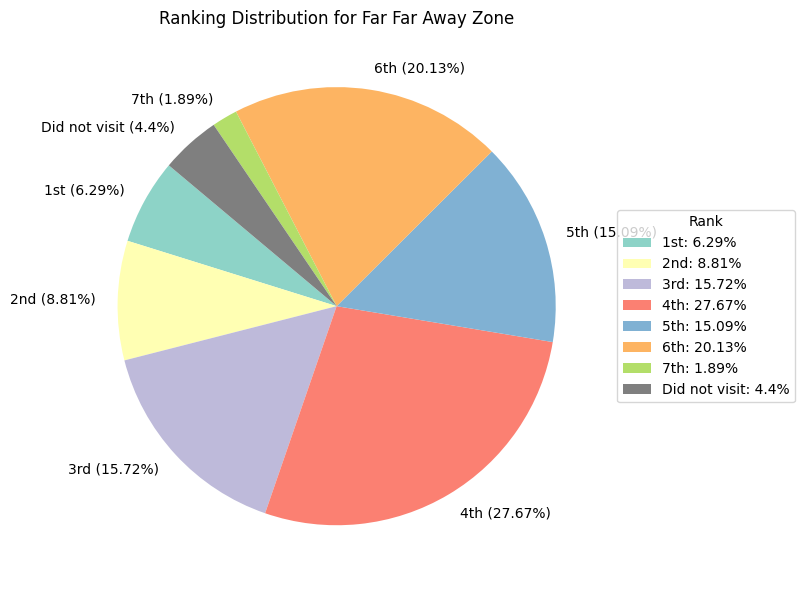

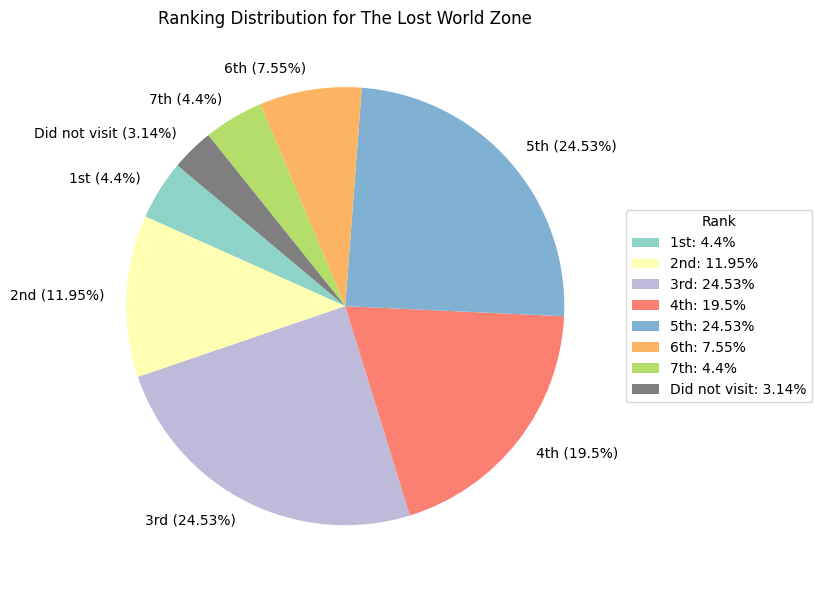

In [196]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')
# print(df.columns)

# Connect to the SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# # Define a fixed color map for ranks
# rank_color_map = {
#     '1st': '#1f77b4',
#     '2nd': '#ff7f0e',
#     '3rd': '#2ca02c',
#     '4th': '#d62728',
#     '5th': '#9467bd',
#     '6th': '#8c564b',
#     '7th': '#e377c2',
#     'Did not visit': '#7f7f7f'
# }

# Define the colormap from Set3
colormap = plt.cm.Set3.colors

# Number of colors required for ranks 1 to 7 (and "Did not visit")
num_colors = 7  # Adjust if you need more colors
colors = colormap[:num_colors]  # Take first 7 colors from Set3

# Create a mapping of rank to colors, including the "Did not visit" color
rank_color_map = {
    '1st': colors[0],  # First color
    '2nd': colors[1],  # Second color
    '3rd': colors[2],  # Third color
    '4th': colors[3],  # Fourth color
    '5th': colors[4],  # Fifth color
    '6th': colors[5],  # Sixth color
    '7th': colors[6],  # Seventh color
    'Did not visit': '#7f7f7f'  # Gray for 'Did not visit'
}

# List of relevant columns for each attraction zone
attraction_columns = [
    "Rank the following theme park zones based on the order in which you visited them. [New York]",
    "Rank the following theme park zones based on the order in which you visited them. [Hollywood]",
    "Rank the following theme park zones based on the order in which you visited them. [Sci-Fi City]",
    "Rank the following theme park zones based on the order in which you visited them. [Madagascar]",
    "Rank the following theme park zones based on the order in which you visited them. [Far Far Away]",
    "Rank the following theme park zones based on the order in which you visited them. [The Lost World]"
]

for column in attraction_columns:
    # Enclose the column name in double quotes for SQL compatibility
    query = f"""
    SELECT 
        COALESCE("{column}", 'Did not visit') AS rank, 
        COUNT(*) AS count,
        ROUND(COUNT(*) * 100.0 / (SELECT COUNT(*) FROM survey_data), 2) AS percentage
    FROM survey_data
    GROUP BY rank
    ORDER BY rank;
    """
    
    # Execute SQL query and create DataFrame
    rank_data = pd.read_sql(query, conn)
    
    # Get colors for each rank based on the map
    colors = [rank_color_map[str(rank)] for rank in rank_data['rank']]
    
    # Plot the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(
        rank_data['count'],
        labels=[f"{rank} ({percent}%)" for rank, percent in zip(rank_data['rank'], rank_data['percentage'])],
        startangle=140,
        colors=colors
    )
    plt.title(f"Ranking Distribution for {column.split('[')[1].split(']')[0]} Zone")
    
    # Place the legend outside the plot area
    plt.legend(
        title="Rank",
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        labels=[f"{rank}: {percent}%" for rank, count, percent in zip(rank_data['rank'], rank_data['count'], rank_data['percentage'])]
    )
    
    plt.tight_layout()
    plt.show()


#### Stacked bar graph such that the x axis represents the count of votes per rank, and the y axis represents the attraction 

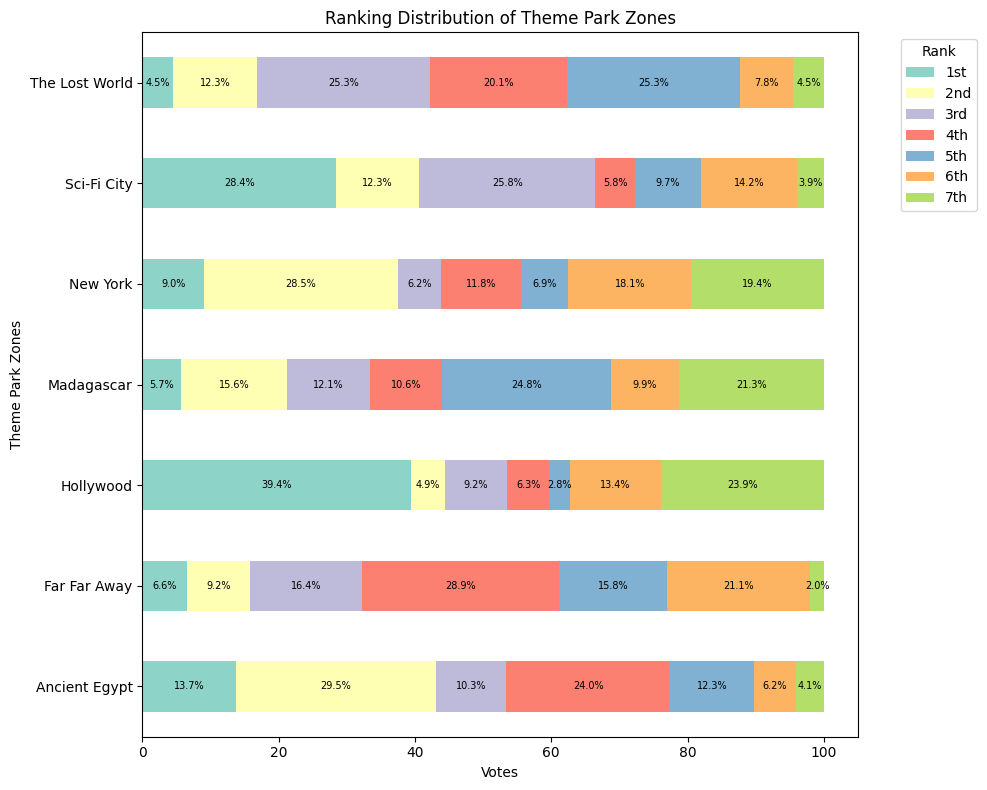

In [208]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Load your Excel file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# Define the attraction columns
attraction_columns = [
    "Rank the following theme park zones based on the order in which you visited them. [New York]",
    "Rank the following theme park zones based on the order in which you visited them. [Hollywood]",
    "Rank the following theme park zones based on the order in which you visited them. [Sci-Fi City]",
    "Rank the following theme park zones based on the order in which you visited them. [Madagascar]",
    "Rank the following theme park zones based on the order in which you visited them. [Far Far Away]",
    "Rank the following theme park zones based on the order in which you visited them. [Ancient Egypt]",
    "Rank the following theme park zones based on the order in which you visited them. [The Lost World]"
]

# Define colors for each rank based on the Set3 color palette
colormap = plt.cm.Set3.colors
colors = colormap[:7]  # First 7 colors from Set3
rank_color_map = {
    '1st': colors[0],
    '2nd': colors[1],
    '3rd': colors[2],
    '4th': colors[3],
    '5th': colors[4],
    '6th': colors[5],
    '7th': colors[6]
    # 'Did not visit': '#7f7f7f'
}

# Prepare DataFrame for stacking plot
summary_data = pd.DataFrame()

for column in attraction_columns:
    # Extract the attraction name
    attraction_name = column.split("[")[1].split("]")[0]
    
    # Query the count of each rank, including "Did not visit" for this attraction
    query = f"""
    SELECT COALESCE("{column}", 'Did not visit') AS rank, COUNT(*) AS count
    FROM survey_data
    GROUP BY rank;
    """
    
    # Execute the query and get results
    data = pd.read_sql(query, conn)
    data['attraction'] = attraction_name  # Add the attraction name as a column
    summary_data = pd.concat([summary_data, data])

# Pivot to prepare for stacked plotting
pivot_data = summary_data.pivot(index='attraction', columns='rank', values='count').fillna(0)

# Sort columns to ensure order by rank
# rank_order = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th', 'Did not visit']
rank_order = ['1st', '2nd', '3rd', '4th', '5th', '6th', '7th'] # do not include 'Did not visit'
pivot_data = pivot_data[rank_order]

# Calculate the total counts for each attraction to compute percentages
pivot_data_percentage = pivot_data.div(pivot_data.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
plt.figure(figsize=(10, 8))
ax = pivot_data_percentage.plot(
    kind='barh', 
    stacked=True, 
    color=[rank_color_map[rank] for rank in rank_order],
    ax=plt.gca()
)

# Add counts on each segment
for i, (attraction, row) in enumerate(pivot_data_percentage.iterrows()):
    cumulative_width = 0
    for rank in rank_order:
        percentage = row[rank]
        if percentage > 0:
            ax.text(
                cumulative_width + percentage / 2,
                i, 
                f'{percentage:.1f}%',
                ha='center',
                va='center',
                fontsize=7
            )
            cumulative_width += percentage

# Final formatting
plt.xlabel('Votes')
plt.ylabel('Theme Park Zones')
plt.title('Ranking Distribution of Theme Park Zones')
plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# take out "Did not visit"
# use graph to propose the pathway that we think people would most likely go for


### Pie chart of how do people find their visit at USS

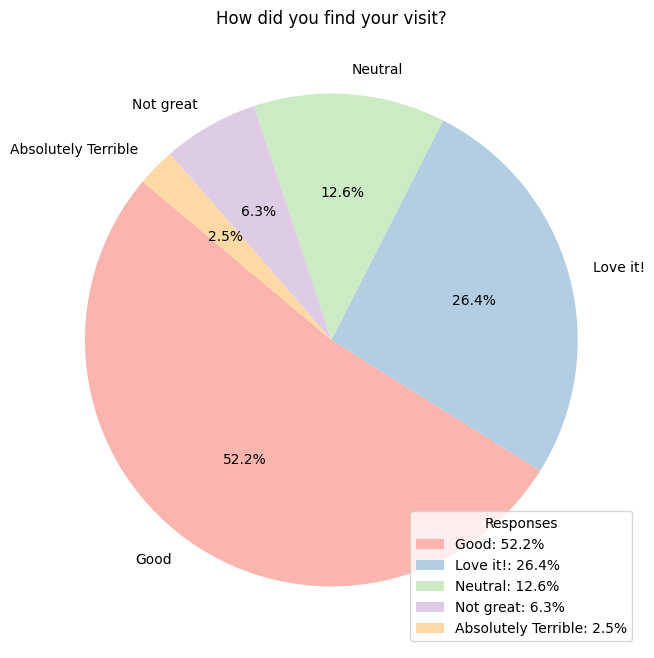

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Group by "How did you find your visit?" column to get response counts
response_counts = df['How did you find your visit?'].value_counts()

# Generate labels for legend with both counts and percentages
total = response_counts.sum()
legend_labels = [f"{label}: {count/total:.1%}" for label, count in zip(response_counts.index, response_counts)]

# Plot the pie chart with soft colors
plt.figure(figsize=(8, 8))
colors = plt.cm.Pastel1.colors  # Soft color palette
plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Add title and legend
plt.title("How did you find your visit?")
plt.legend(legend_labels, title="Responses", loc="lower right", bbox_to_anchor=(1, 0))
plt.show()


I want to compare satisfaction levels across different visitor groups by taking the "How did you find your visit?" column and the "Which age group do you belong to?" column. I want to see if certain age groups are more or less satisfied overall.

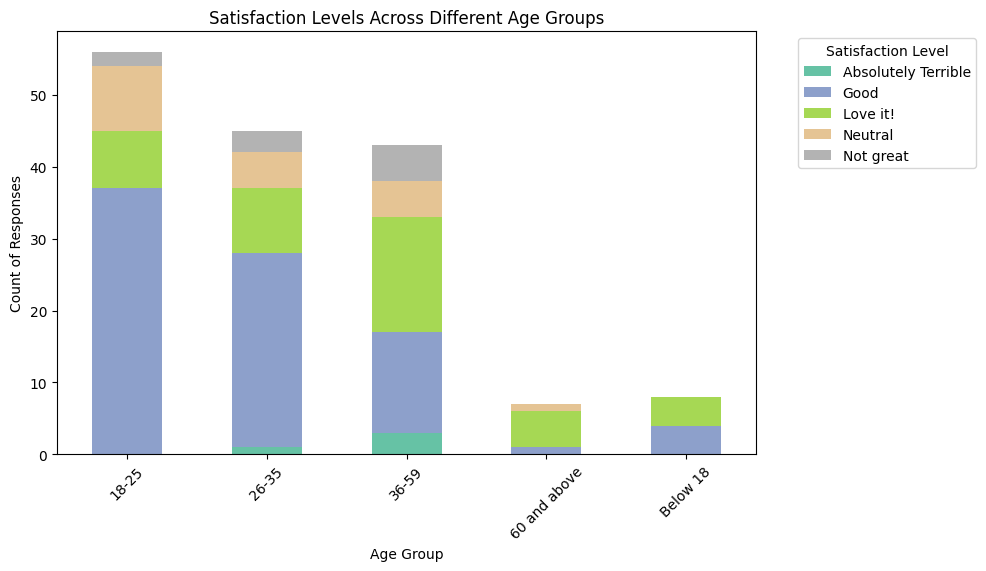

In [56]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count satisfaction responses by age group
query = """
SELECT 
    "Which age group do you belong to?" AS AgeGroup,
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY AgeGroup, Satisfaction
ORDER BY AgeGroup;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting
pivot_df = result_df.pivot(index="AgeGroup", columns="Satisfaction", values="Count").fillna(0)

# Plot a stacked bar chart to show satisfaction levels by age group
pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2")
plt.title("Satisfaction Levels Across Different Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count of Responses")
plt.legend(title="Satisfaction Level", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


I want to compare satisfaction levels across different visitor groups by taking the "How did you find your visit?" column and the "Are you Singaporean/PR or Foreigner?" column. I want to see if their country demographics affect their satisfaction levels.

In [226]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count satisfaction responses by country demographics (Singaporean/PR vs Foreigner)
query = """
SELECT 
    "Are you Singaporean/PR or Foreigner?" AS Demographics,
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY Demographics, Satisfaction
ORDER BY Satisfaction;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting (Satisfaction level on x-axis)
pivot_df = result_df.pivot(index="Satisfaction", columns="Demographics", values="Count").fillna(0)
# print(pivot_df)

new_pivot_df = pivot_df.T
print(new_pivot_df)


Satisfaction           Absolutely Terrible  Good  Love it!  Neutral  Not great
Demographics                                                                  
I am a Singaporean/PR                    1    39        14       14          4
I am a foreigner                         3    44        28        6          6


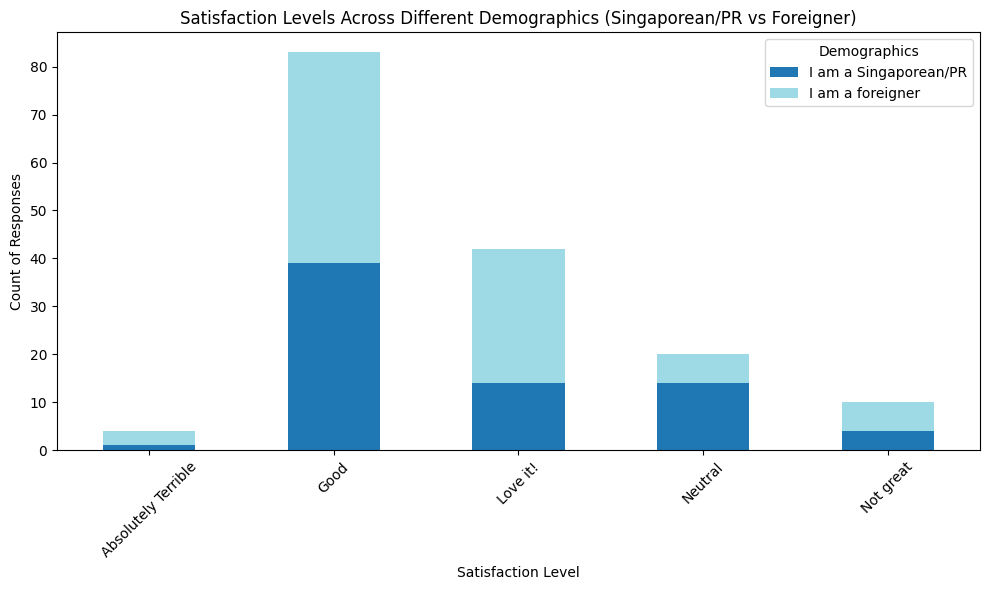

In [213]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count satisfaction responses by country demographics (Singaporean/PR vs Foreigner)
query = """
SELECT 
    "Are you Singaporean/PR or Foreigner?" AS Demographics,
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY Demographics, Satisfaction
ORDER BY Satisfaction;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting (Satisfaction level on x-axis)
pivot_df = result_df.pivot(index="Satisfaction", columns="Demographics", values="Count").fillna(0)

# Plot a stacked bar chart to show satisfaction levels by demographic group
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="tab20")

# Add title and labels
plt.title("Satisfaction Levels Across Different Demographics (Singaporean/PR vs Foreigner)")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count of Responses")

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


Bar graph shows the number of responses who voted for a specific satisfaction level among Singaporean/PR vs Foreigners

Satisfaction           Absolutely Terrible  Good  Love it!  Neutral  Not great
Demographics                                                                  
I am a Singaporean/PR                    1    39        14       14          4
I am a foreigner                         3    44        28        6          6


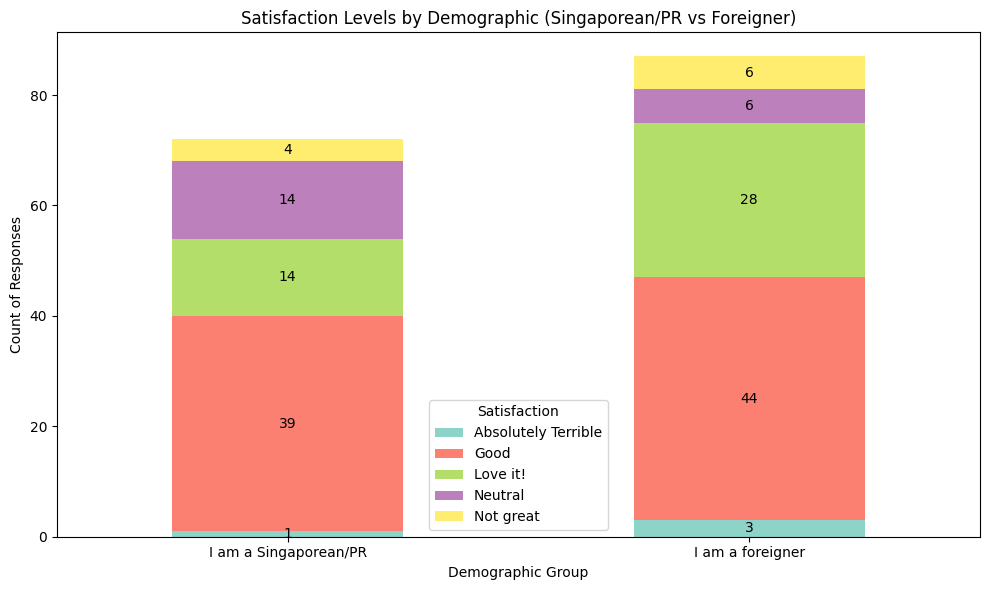

In [261]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count satisfaction responses by country demographics (Singaporean/PR vs Foreigner)
query = """
SELECT 
    "Are you Singaporean/PR or Foreigner?" AS Demographics,
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY Demographics, Satisfaction
ORDER BY Satisfaction;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting (Satisfaction level on x-axis)
pivot_df = result_df.pivot(index="Satisfaction", columns="Demographics", values="Count").fillna(0)

# Transpose the pivot table
new_pivot_df = pivot_df.T
print(new_pivot_df)

# Plot a stacked bar chart to show the count of responses for each satisfaction level
ax = new_pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")

# Add annotations for each bar segment
for p in ax.patches:
    # Get the height (count) of each segment
    height = p.get_height()
    # Get the x and y position to place the annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    
    # Get the count value from the bar segment
    count = int(height)
    
    # Annotate the bar with the count
    ax.annotate(f'{count}', (x, y), ha='center', va='center', fontsize=10, color='black')

# Add title and labels
plt.title("Satisfaction Levels by Demographic (Singaporean/PR vs Foreigner)")
plt.xlabel("Demographic Group")
plt.ylabel("Count of Responses")

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=0)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


comparing % of singaporeans/PR vs foreigners who voted for a certain satsfaction level


Satisfaction           Absolutely Terrible       Good   Love it!  Neutral  \
Demographics                                                                
I am a Singaporean/PR                 25.0  46.987952  33.333333     70.0   
I am a foreigner                      75.0  53.012048  66.666667     30.0   

Satisfaction           Not great  
Demographics                      
I am a Singaporean/PR       40.0  
I am a foreigner            60.0  


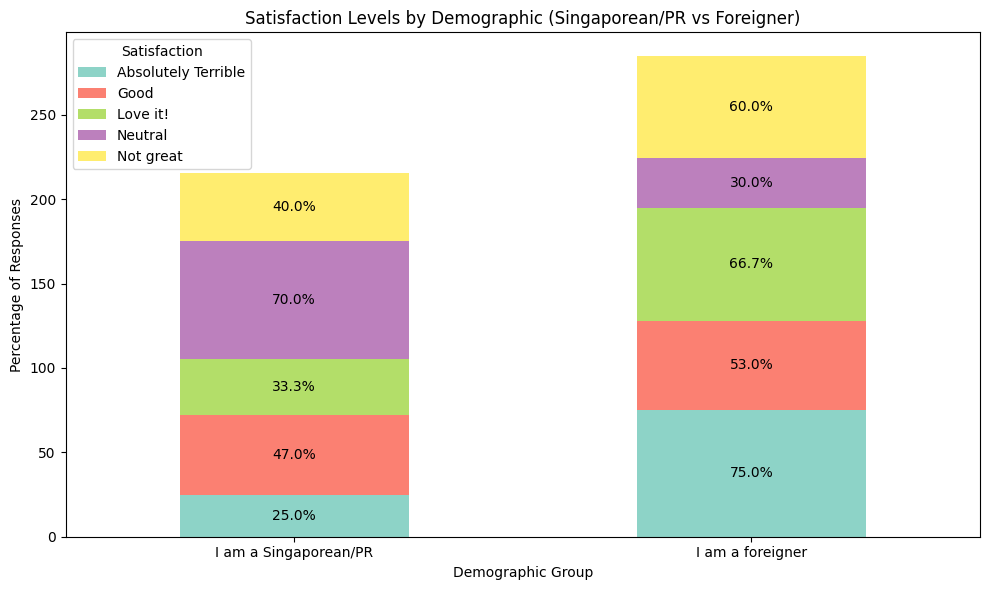

In [213]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count satisfaction responses by country demographics (Singaporean/PR vs Foreigner)
query = """
SELECT 
    "Are you Singaporean/PR or Foreigner?" AS Demographics,
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY Demographics, Satisfaction
ORDER BY Satisfaction;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting (Satisfaction level on x-axis)
pivot_df = result_df.pivot(index="Satisfaction", columns="Demographics", values="Count").fillna(0)

# Calculate the total count for each satisfaction level to calculate percentages
total_counts = pivot_df.sum(axis=1)

# Calculate percentages for each demographic group
pivot_df_percentage = pivot_df.div(total_counts, axis=0) * 100

# Transpose the pivot table
new_pivot_df = pivot_df_percentage.T
print(new_pivot_df)

# Plot a stacked bar chart to show the percentage of responses for each satisfaction level
ax = new_pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")

# Add annotations for each bar segment (percentage instead of count)
for p in ax.patches:
    # Get the height (percentage) of each segment
    height = p.get_height()
    if height == 0:  # Skip zero percentage segments
        continue
    
    # Get the x and y position to place the annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    
    # Get the percentage value
    percentage = height
    
    # Annotate the bar with the percentage
    ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='center', fontsize=10, color='black')

# Add title and labels
plt.title("Satisfaction Levels by Demographic (Singaporean/PR vs Foreigner)")
plt.xlabel("Demographic Group")
plt.ylabel("Percentage of Responses")

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=0)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


now I want to compare the satisfaction levels across different visitor groups (ie take the column "Did you visit the theme park with other people?" and compare whether there is a relationship with the column "How did you find your visit?"). i want to see if there is a reason why some people are more or less satisfied overall - could it be due to the people that they go with?

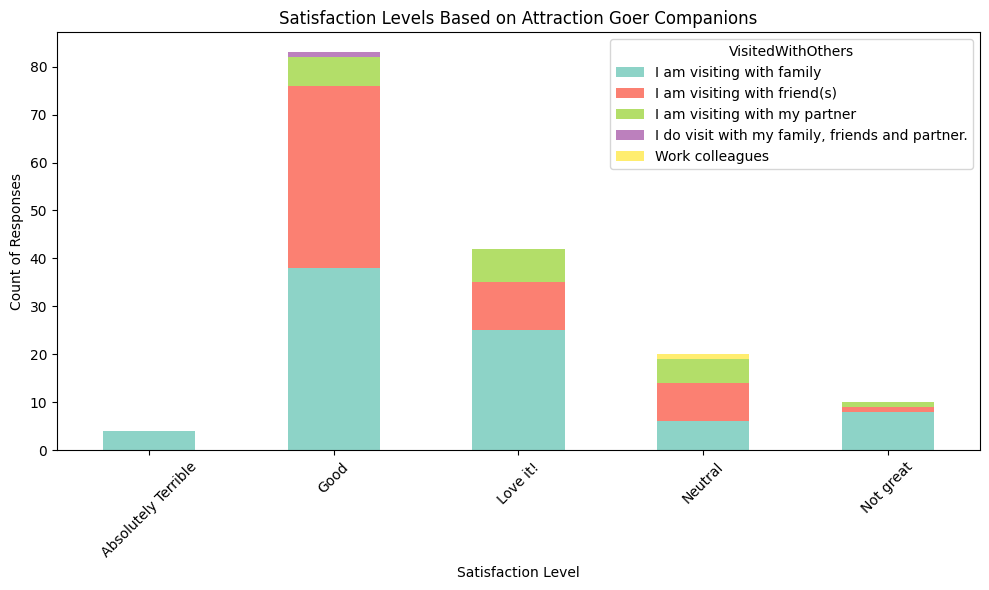

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count satisfaction responses by whether people visited with others or not
query = """
SELECT 
    "Did you visit the theme park with other people?" AS VisitedWithOthers,
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY VisitedWithOthers, Satisfaction
ORDER BY Satisfaction;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting (Satisfaction level on x-axis)
pivot_df = result_df.pivot(index="Satisfaction", columns="VisitedWithOthers", values="Count").fillna(0)

# Remove rows where all values are zero
pivot_df = pivot_df.loc[(pivot_df.sum(axis=1) > 0), :]

# Plot a stacked bar chart to compare satisfaction levels based on whether people visited with others
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")

# Add annotations for each bar segment
for p in ax.patches:
    # Get the height (count) of each segment
    height = p.get_height()
    if height == 0:  # Skip zero count segments
        continue
    
    # Get the x and y position to place the annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    
    # Get the count value from the bar segment
    count = int(height)
    
    # Annotate the bar with the count
    # ax.annotate(f'{count}', (x, y), ha='center', va='center', fontsize=10, color='black')

# Add title and labels
plt.title("Satisfaction Levels Based on Attraction Goer Companions")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count of Responses")

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

same as above, but order the bar charts (Love it! -> Good -> Neutral -> Not great -> Absolutely Terrible)

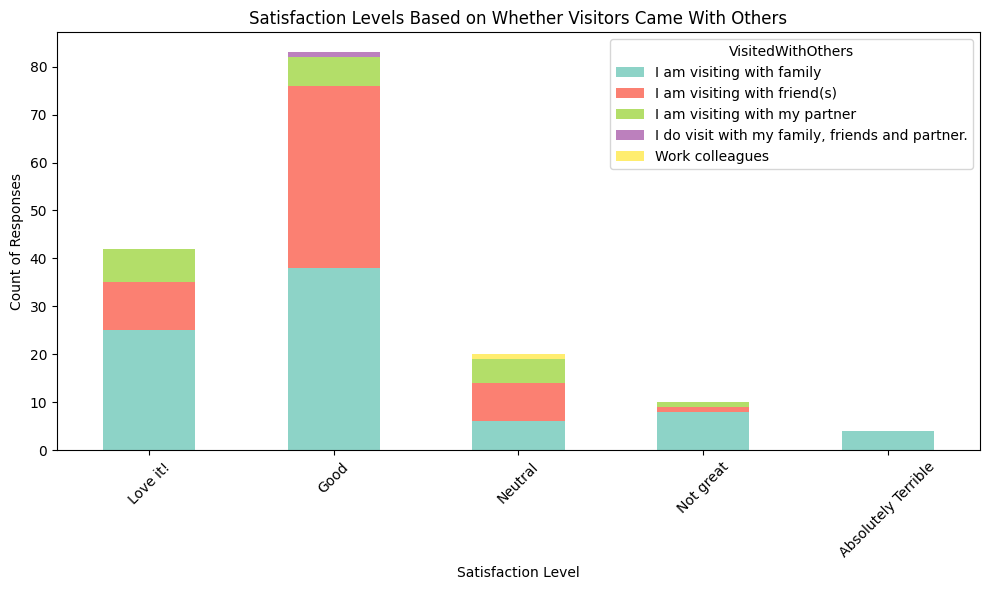

In [4]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count satisfaction responses by whether people visited with others or not
query = """
SELECT 
    "Did you visit the theme park with other people?" AS VisitedWithOthers,
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY VisitedWithOthers, Satisfaction
ORDER BY Satisfaction;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting (Satisfaction level on x-axis)
pivot_df = result_df.pivot(index="Satisfaction", columns="VisitedWithOthers", values="Count").fillna(0)

# Remove rows where all values are zero
pivot_df = pivot_df.loc[(pivot_df.sum(axis=1) > 0), :]

# Define the custom order for satisfaction levels
satisfaction_order = ["Love it!", "Good", "Neutral", "Not great", "Absolutely Terrible"]

# Reorder the rows of the pivot_df based on the custom order
pivot_df = pivot_df.reindex(satisfaction_order)

# Plot a stacked bar chart to compare satisfaction levels based on whether people visited with others
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")

# Add annotations for each bar segment
for p in ax.patches:
    # Get the height (count) of each segment
    height = p.get_height()
    if height == 0:  # Skip zero count segments
        continue
    
    # Get the x and y position to place the annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    
    # Get the count value from the bar segment
    count = int(height)
    
    # Annotate the bar with the count
    # ax.annotate(f'{count}', (x, y), ha='center', va='center', fontsize=10, color='black')

# Add title and labels
plt.title("Satisfaction Levels Based on Whether Visitors Came With Others")
plt.xlabel("Satisfaction Level")
plt.ylabel("Count of Responses")

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


Comparing among satisfaction levels, the distribution of companionship for each satisfaction level

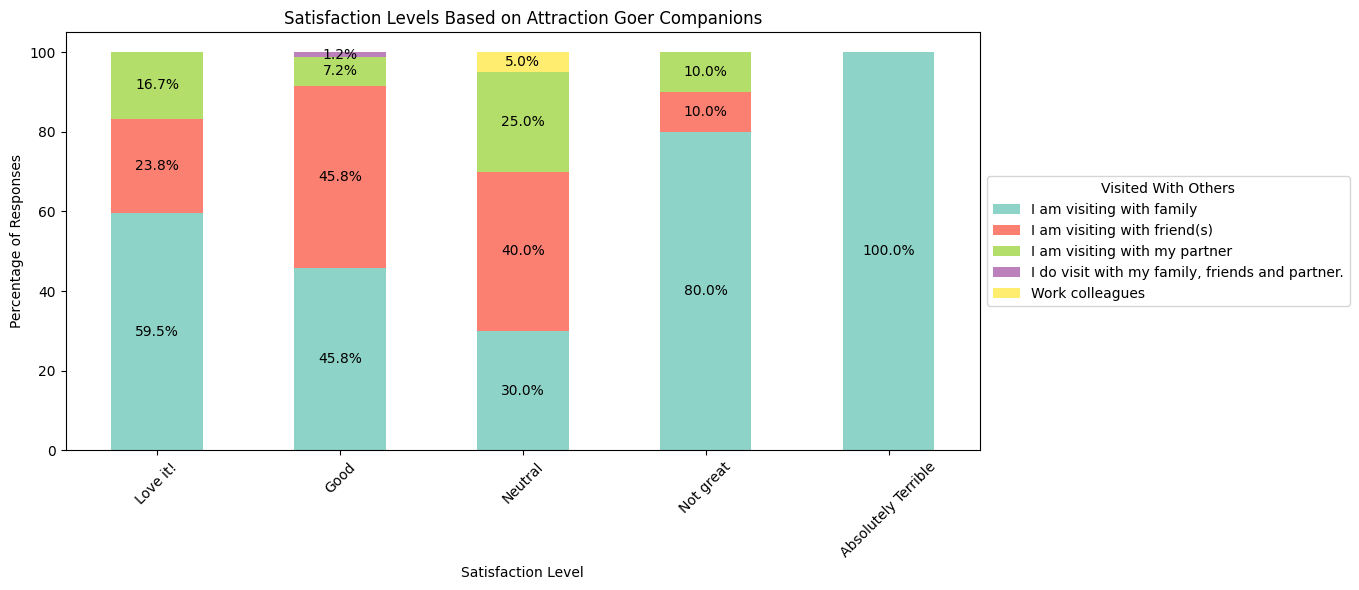

In [221]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count satisfaction responses by whether people visited with others or not
query = """
SELECT 
    "Did you visit the theme park with other people?" AS VisitedWithOthers,
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY VisitedWithOthers, Satisfaction
ORDER BY Satisfaction;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting (Satisfaction level on x-axis)
pivot_df = result_df.pivot(index="Satisfaction", columns="VisitedWithOthers", values="Count").fillna(0)

# Remove rows where all values are zero
pivot_df = pivot_df.loc[(pivot_df.sum(axis=1) > 0), :]

# Calculate percentages for each satisfaction level
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Define the custom order for satisfaction levels
satisfaction_order = ["Love it!", "Good", "Neutral", "Not great", "Absolutely Terrible"]

# Reorder the DataFrame based on the custom satisfaction order
pivot_df_percentage = pivot_df_percentage.loc[satisfaction_order]

# Plot a stacked bar chart to compare satisfaction levels based on whether people visited with others
ax = pivot_df_percentage.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")

# Add annotations for each bar segment (percentage instead of count)
for p in ax.patches:
    # Get the height (percentage) of each segment
    height = p.get_height()
    if height == 0:  # Skip zero segments
        continue
    
    # Get the x and y position to place the annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    
    # Get the percentage value
    percentage = height
    
    # Annotate the bar with the percentage
    ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='center', fontsize=10, color='black')

# Add title and labels
plt.title("Satisfaction Levels Based on Attraction Goer Companions")
plt.xlabel("Satisfaction Level")
plt.ylabel("Percentage of Responses")

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Move the legend outside of the plot to avoid overlap with the graph
plt.legend(title="Visited With Others", bbox_to_anchor=(1, 0.5), loc='center left')

# Show the plot
plt.show()


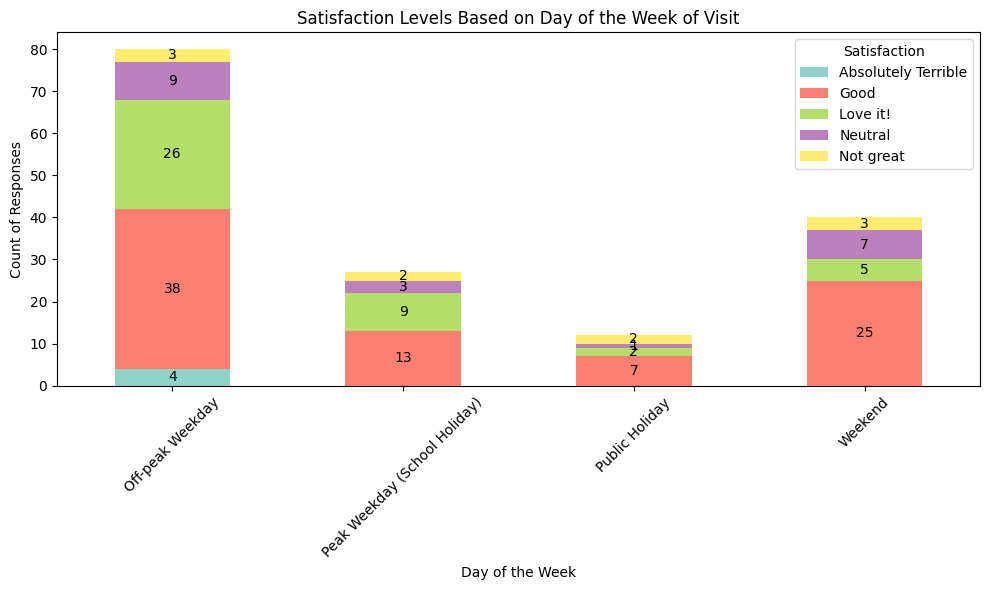

In [264]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count satisfaction responses by the day of the week and satisfaction
query = """
SELECT 
    "What day of the week did you visit?" AS DayOfVisit,
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY DayOfVisit, Satisfaction
ORDER BY DayOfVisit, Satisfaction;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting (Satisfaction level on x-axis)
pivot_df = result_df.pivot(index="DayOfVisit", columns="Satisfaction", values="Count").fillna(0)

# Remove rows where all values are zero (if there are no responses for certain days and satisfaction combinations)
pivot_df = pivot_df.loc[(pivot_df.sum(axis=1) > 0), :]

# Plot a stacked bar chart to compare satisfaction levels based on the day of the week
ax = pivot_df.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")

# Add annotations for each bar segment
for p in ax.patches:
    # Get the height (count) of each segment
    height = p.get_height()
    if height == 0:  # Skip zero count segments
        continue
    
    # Get the x and y position to place the annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    
    # Get the count value from the bar segment
    count = int(height)
    
    # Annotate the bar with the count
    ax.annotate(f'{count}', (x, y), ha='center', va='center', fontsize=10, color='black')

# Add title and labels
plt.title("Satisfaction Levels Based on Day of the Week of Visit")
plt.xlabel("Day of the Week")
plt.ylabel("Count of Responses")

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# put percentage instead of counts

stacked bar graph showing distribution of attraction goers' satisfaction levels for each category of day-of-visit

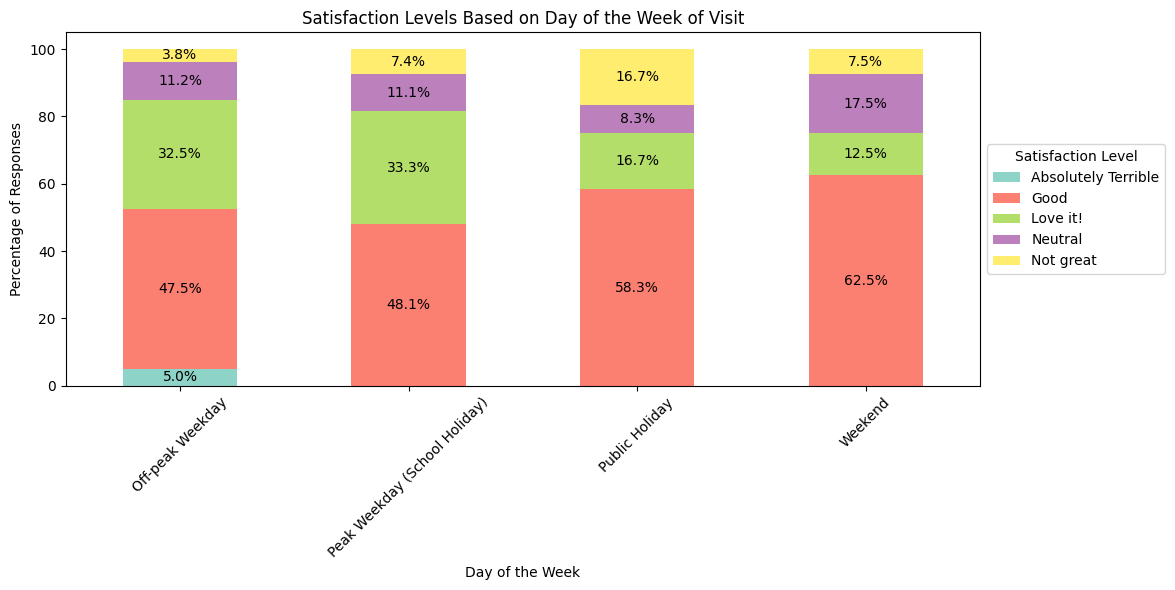

In [227]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count satisfaction responses by the day of the week and satisfaction
query = """
SELECT 
    "What day of the week did you visit?" AS DayOfVisit,
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY DayOfVisit, Satisfaction
ORDER BY DayOfVisit, Satisfaction;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting (Satisfaction level on x-axis)
pivot_df = result_df.pivot(index="DayOfVisit", columns="Satisfaction", values="Count").fillna(0)

# Remove rows where all values are zero (if there are no responses for certain days and satisfaction combinations)
pivot_df = pivot_df.loc[(pivot_df.sum(axis=1) > 0), :]

# Calculate percentages for each satisfaction level
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart to compare satisfaction levels based on the day of the week
ax = pivot_df_percentage.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")

# Add annotations for each bar segment (percentage instead of count)
for p in ax.patches:
    # Get the height (percentage) of each segment
    height = p.get_height()
    if height == 0:  # Skip zero segments
        continue
    
    # Get the x and y position to place the annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    
    # Get the percentage value
    percentage = height
    
    # Annotate the bar with the percentage
    ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='center', fontsize=10, color='black')

# Add title and labels
plt.title("Satisfaction Levels Based on Day of the Week of Visit")
plt.xlabel("Day of the Week")
plt.ylabel("Percentage of Responses")

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=45)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Adjust the legend position to avoid covering the plot
plt.legend(title="Satisfaction Level", bbox_to_anchor=(1, 0.5), loc='center left')

# Show the plot
plt.show()


To assess the likelihood of a return visit as an overall indicator of satisfaction, we use the "Would you visit Universal Studios again?" column. This response can give us insights into how satisfied people are based on their willingness to return.

Comparing people's satisfaction levels and their willingness to return
1. enjoyed -> voted yes (to return to USS)
2. enjoyed -> voted no (not to return to USS)
3. did not enjoy -> voted no (not to return to USS)

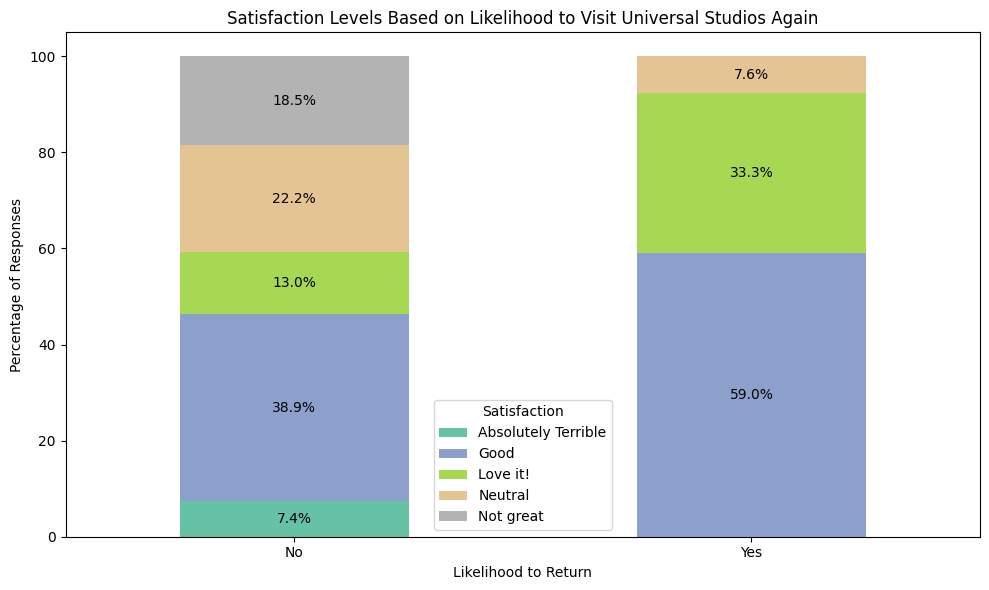

In [230]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to count responses for likelihood of return and satisfaction
query = """
SELECT 
    "Would you visit Universal Studios again?" AS LikelihoodToReturn,  
    "How did you find your visit?" AS Satisfaction,
    COUNT(*) AS Count
FROM survey_data
GROUP BY LikelihoodToReturn, Satisfaction
ORDER BY LikelihoodToReturn, Satisfaction;
"""

# Execute the query and load results into a DataFrame
result_df = pd.read_sql_query(query, conn)
conn.close()  # Close the database connection

# Pivot the data for easier plotting (Likelihood to Return on x-axis)
pivot_df = result_df.pivot(index="LikelihoodToReturn", columns="Satisfaction", values="Count").fillna(0)

# Remove rows where all values are zero (if no responses for certain combinations)
pivot_df = pivot_df.loc[(pivot_df.sum(axis=1) > 0), :]

# Calculate percentages for each satisfaction level within each Likelihood to Return category
pivot_df_percentage = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Plot a stacked bar chart to compare satisfaction levels based on likelihood to return.
ax = pivot_df_percentage.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set2")

# Add annotations for each bar segment (percentage instead of count)
for p in ax.patches:
    # Get the height (percentage) of each segment
    height = p.get_height()
    if height == 0:  # Skip zero segments
        continue
    
    # Get the x and y position to place the annotation
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + height / 2
    
    # Get the percentage value
    percentage = height
    
    # Annotate the bar with the percentage (rounded to 1 decimal place)
    ax.annotate(f'{percentage:.1f}%', (x, y), ha='center', va='center', fontsize=10, color='black')

# Add title and labels
plt.title("Satisfaction Levels Based on Likelihood to Visit Universal Studios Again")
plt.xlabel("Likelihood to Return")
plt.ylabel("Percentage of Responses")

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=0)

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


#### trying to identify why people are dissatisfied based on their provided reason in the column "Could you elaborate on why you would / would not visit USS again?"
1. those who said that their experience was "Not great"

                                            feedback      reason_long  \
0  was mind boggling to see that they have just p...  Long Wait Times   
1  Had to wait for hours for attractions, bought ...  Long Wait Times   
2  Ride has estimated waiting time of 90min. It r...  Long Wait Times   
3  The place was unbearably crowded and it felt l...  Long Wait Times   

    reason_waste reason_expensive reason_technical_issues reason_too_small  \
0           None             None                    None             None   
1           None             None                    None             None   
2           None             None                    None             None   
3  Waste of Time             None        Technical Issues             None   

  reason_others  
0          None  
1          None  
2          None  
3          None  
                                            feedback  \
0  was mind boggling to see that they have just p...   
1  Had to wait for hours for attractions,

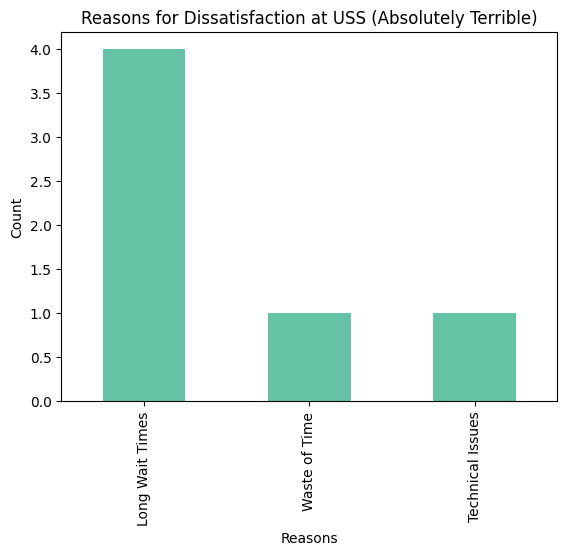

In [6]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

query = """
SELECT 
    "Could you elaborate on why you would / would not visit USS again?" AS feedback,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" IS NULL THEN 'NA'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%wait%' THEN 'Long Wait Times'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%long%' THEN 'Long Wait Times'
        ELSE NULL
    END AS reason_long,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%waste%' THEN 'Waste of Time'
        ELSE NULL
    END AS reason_waste,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%expensive%' THEN 'Expensive'
        ELSE NULL
    END AS reason_expensive,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%technical issues%' THEN 'Technical Issues'
        ELSE NULL
    END AS reason_technical_issues,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%small%' THEN 'Attraction too small'
        ELSE NULL
    END AS reason_too_small,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" IS NOT NULL
            AND (
                "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%wait%'
                AND "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%long%'
                AND "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%waste%'
                AND "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%expensive%'
                AND "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%technical issues%'
                AND "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%small%'
            ) THEN 'Others'
        ELSE NULL
    END AS reason_others
FROM survey_data
WHERE "How did you find your visit?" = 'Absolutely Terrible'
"""

# Run the query
df_dissatisfaction_multi = pd.read_sql_query(query, conn)
print(df_dissatisfaction_multi)

# Combine the reasons into a single column with multiple factors
df_dissatisfaction_multi['combined_reasons'] = df_dissatisfaction_multi[['reason_long', 'reason_waste', 'reason_expensive', 'reason_technical_issues', 'reason_too_small']].apply(
    lambda row: ', '.join(filter(None, row)), axis=1
)

# Display the categorized responses with combined reasons
print(df_dissatisfaction_multi[['feedback', 'combined_reasons']])

from collections import Counter

# Flatten the combined_reasons column to count each individual reason
# Split each entry by comma and remove whitespace
reasons_list = df_dissatisfaction_multi['combined_reasons'].dropna().apply(lambda x: x.split(', ')).sum()

# Count each unique reason
reason_counts = Counter(reasons_list)

# Convert to DataFrame for plotting
reason_counts_df = pd.DataFrame(reason_counts.items(), columns=['Reason', 'Count'])

# Replace any empty space (' ') reason with 'Others'
reason_counts_df['Reason'] = reason_counts_df['Reason'].replace("", 'Others')

# Filter out 'Others' and 'NA' from the DataFrame
reason_counts_df = reason_counts_df[~reason_counts_df['Reason'].isin(['Others', 'NA'])]

print(reason_counts_df)

# Plot the bar chart
reason_counts_df.plot(kind='bar', x='Reason', y='Count', legend=False, title='Reasons for Dissatisfaction at USS (Absolutely Terrible)', colormap = 'Set2')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.show()


2. those who said their experience was "Absolutely Terrible"

                                            feedback      reason_long  \
0  Very expensive, weather hot and rides too scar...             None   
1  We went in a week day - Long waits for rides, ...  Long Wait Times   
2                                               None               NA   
3                                               None               NA   
4                                               None               NA   
5                                               None               NA   
6                                               None               NA   
7                                               None               NA   
8  Lack of communicating vital information to vis...             None   
9  Express pass is expensive and we still have to...             None   

    reason_waste reason_expensive reason_technical_issues  \
0           None        Expensive                    None   
1  Waste of Time        Expensive                    None   
2           N

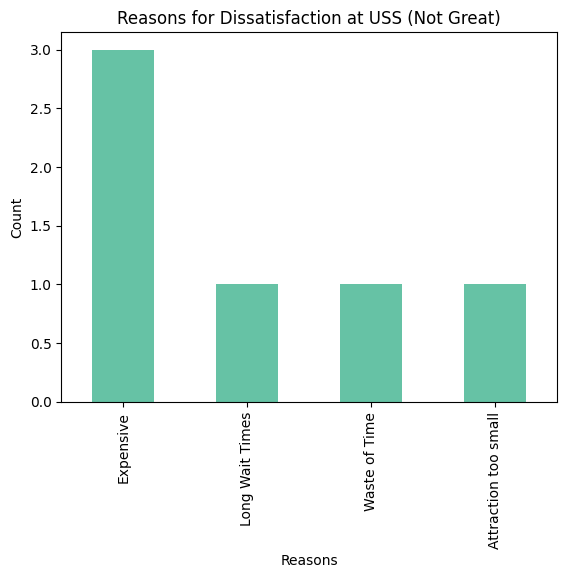

In [7]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

query = """
SELECT 
    "Could you elaborate on why you would / would not visit USS again?" AS feedback,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" IS NULL THEN 'NA'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%wait%' THEN 'Long Wait Times'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%long%' THEN 'Long Wait Times'
        ELSE NULL
    END AS reason_long,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%waste%' THEN 'Waste of Time'
        ELSE NULL
    END AS reason_waste,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%expensive%' THEN 'Expensive'
        ELSE NULL
    END AS reason_expensive,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%technical issues%' THEN 'Technical Issues'
        ELSE NULL
    END AS reason_technical_issues,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%small%' THEN 'Attraction too small'
        ELSE NULL
    END AS reason_too_small,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" IS NOT NULL
            AND (
                "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%wait%'
                AND "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%long%'
                AND "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%waste%'
                AND "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%expensive%'
                AND "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%technical issues%'
                AND "Could you elaborate on why you would / would not visit USS again?" NOT LIKE '%small%'
            ) THEN 'Others'
        ELSE NULL
    END AS reason_others
FROM survey_data
WHERE "How did you find your visit?" = 'Not great'
"""

# Run the query
df_dissatisfaction_multi = pd.read_sql_query(query, conn)
print(df_dissatisfaction_multi)

# Combine the reasons into a single column with multiple factors
df_dissatisfaction_multi['combined_reasons'] = df_dissatisfaction_multi[['reason_long', 'reason_waste', 'reason_expensive', 'reason_technical_issues', 'reason_too_small']].apply(
    lambda row: ', '.join(filter(None, row)), axis=1
)

# Display the categorized responses with combined reasons
print(df_dissatisfaction_multi[['feedback', 'combined_reasons']])

# Flatten the combined_reasons column to count each individual reason
# Split each entry by comma and remove whitespace
reasons_list = df_dissatisfaction_multi['combined_reasons'].dropna().apply(lambda x: x.split(', ')).sum()

# Count each unique reason
reason_counts = Counter(reasons_list)

# Convert to DataFrame for plotting
reason_counts_df = pd.DataFrame(reason_counts.items(), columns=['Reason', 'Count'])

# Replace any empty space (' ') reason with 'Others'
reason_counts_df['Reason'] = reason_counts_df['Reason'].replace("", 'Others')

# Filter out 'Others' and 'NA' from the DataFrame
reason_counts_df = reason_counts_df[~reason_counts_df['Reason'].isin(['Others', 'NA'])]

# Plot the bar chart
reason_counts_df.plot(kind='bar', x='Reason', y='Count', legend=False, title='Reasons for Dissatisfaction at USS (Not Great)', colormap = 'Set2')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.show()



3. those who said that they would not want to revisit USS

                                             feedback      reason_long  \
0                                                None               NA   
1   Not enticing to me, the rides offered were sli...             None   
2                      Cause I got bored of the rides             None   
3   It is really fun to go with friends and family...             None   
4   went a few times already, rides are all the same.             None   
5   Ticket is too expensive, unless someone buys i...             None   
6   Very expensive, weather hot and rides too scar...             None   
7                                                None               NA   
8                                  Boring, expensive              None   
9                                     Once is enough              None   
10                                  No time and money             None   
11                                Went too many times             None   
12                             I have 

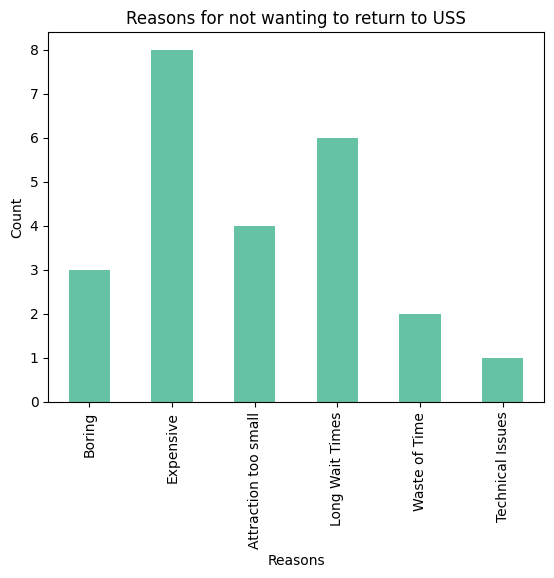

In [248]:
# SQL query to filter for "Not great" responses and categorize multiple reasons
query = """
SELECT 
    "Could you elaborate on why you would / would not visit USS again?" AS feedback,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" IS NULL THEN 'NA'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%wait%' THEN 'Long Wait Times'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%long%' THEN 'Long Wait Times'
        ELSE NULL
    END AS reason_long,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%waste%' THEN 'Waste of Time'
        ELSE NULL
    END AS reason_waste,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%expensive%' THEN 'Expensive'
        ELSE NULL
    END AS reason_expensive,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%technical issues%' THEN 'Technical Issues'
        ELSE NULL
    END AS reason_technical_issues,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%boring%' THEN 'Boring'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%bored%' THEN 'Boring'
        ELSE NULL
    END AS reason_boring,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%small%' THEN 'Attraction too small'
        ELSE NULL
    END AS reason_small,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%hot%' THEN 'Hot'
        ELSE NULL
    END AS reason_hot,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%humid%' THEN 'Humid'
        ELSE NULL
    END AS reason_humid,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%rained%' THEN 'Insufficient Shelters'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%shelter%' THEN 'Insufficient Shelters'
        ELSE NULL
    END AS reason_lack_shelter
FROM survey_data
WHERE "Would you visit Universal Studios again?" = 'No'
"""

# Run the query
df_dissatisfaction_multi = pd.read_sql_query(query, conn)
print(df_dissatisfaction_multi)

# Combine the reasons into a single column with multiple factors
df_dissatisfaction_multi['combined_reasons'] = df_dissatisfaction_multi[['reason_long', 'reason_waste', 'reason_expensive', 'reason_technical_issues', 'reason_boring', 'reason_small']].apply(
    lambda row: ', '.join(filter(None, row)), axis=1
)

# Remove rows where the combined_reasons column contains 'NA'
df_dissatisfaction_multi = df_dissatisfaction_multi[df_dissatisfaction_multi['combined_reasons'] != 'NA']

# Replace empty or space-only entries with 'Others'
df_dissatisfaction_multi['combined_reasons'] = df_dissatisfaction_multi['combined_reasons'].apply(lambda x: 'Others' if not x.strip() else x)

# Display the categorized responses with combined reasons
print(df_dissatisfaction_multi[['feedback', 'combined_reasons']])

# Flatten the combined_reasons column to count each individual reason
# Split each entry by comma and remove whitespace
reasons_list = df_dissatisfaction_multi['combined_reasons'].dropna().apply(lambda x: x.split(', ')).sum()
print(reasons_list)
# Count each unique reason
reason_counts = Counter(reasons_list)

# Convert to DataFrame for plotting
reason_counts_df = pd.DataFrame(reason_counts.items(), columns=['Reason', 'Count'])

# Filter out 'Others' and 'NA' from the DataFrame
reason_counts_df = reason_counts_df[~reason_counts_df['Reason'].isin(['Others', 'NA'])]

# Plot the bar chart
reason_counts_df.plot(kind='bar', x='Reason', y='Count', legend=False, title='Reasons for not wanting to return to USS', colormap='Set2')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


4. those who said that they would not want to revisit USS, despite their satisfaction response being positive

                                             feedback reason_long  \
0                                                None          NA   
1                      Cause I got bored of the rides        None   
2   It is really fun to go with friends and family...        None   
3   Ticket is too expensive, unless someone buys i...        None   
4                                                None          NA   
5                                     Once is enough         None   
6                                   No time and money        None   
7                                 Went too many times        None   
8   Entrance ticket is too expensive for such a sm...        None   
9                                                None          NA   
10                                               None          NA   
11                                               None          NA   
12                                               None          NA   
13                                

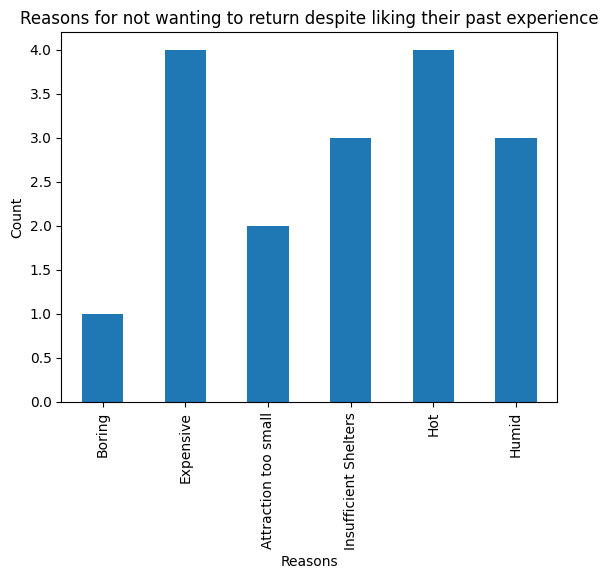

In [251]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to filter for "Not great" responses and categorize multiple reasons
query = """
SELECT 
    "Could you elaborate on why you would / would not visit USS again?" AS feedback,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" IS NULL THEN 'NA'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%wait%' THEN 'Long Wait Times'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%long%' THEN 'Long Wait Times'
        ELSE NULL
    END AS reason_long,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%waste%' THEN 'Waste of Time'
        ELSE NULL
    END AS reason_waste,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%expensive%' THEN 'Expensive'
        ELSE NULL
    END AS reason_expensive,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%technical issues%' THEN 'Technical Issues'
        ELSE NULL
    END AS reason_technical_issues,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%boring%' THEN 'Boring'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%bored%' THEN 'Boring'
        ELSE NULL
    END AS reason_boring,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%small%' THEN 'Attraction too small'
        ELSE NULL
    END AS reason_small,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%hot%' THEN 'Hot'
        ELSE NULL
    END AS reason_hot,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%humid%' THEN 'Humid'
        ELSE NULL
    END AS reason_humid,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%rained%' THEN 'Insufficient Shelters'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%shelter%' THEN 'Insufficient Shelters'
        ELSE NULL
    END AS reason_lack_shelter
FROM survey_data
WHERE "Would you visit Universal Studios again?" = 'No'
    AND "How did you find your visit?" IN ('Good', 'Love it!')
"""

# Run the query
df_dissatisfaction_multi = pd.read_sql_query(query, conn)
print(df_dissatisfaction_multi)

# Combine the reasons into a single column with multiple factors
df_dissatisfaction_multi['combined_reasons'] = df_dissatisfaction_multi[['reason_long', 'reason_waste', 'reason_expensive', 'reason_technical_issues', 'reason_boring', 'reason_small', 'reason_hot', 'reason_humid', 'reason_lack_shelter']].apply(
    lambda row: ', '.join(filter(None, row)), axis=1
)

# Remove rows where the combined_reasons column contains 'NA'
df_dissatisfaction_multi = df_dissatisfaction_multi[df_dissatisfaction_multi['combined_reasons'] != 'NA']

# Replace empty or space-only entries with 'Others'
df_dissatisfaction_multi['combined_reasons'] = df_dissatisfaction_multi['combined_reasons'].apply(lambda x: 'Others' if not x.strip() else x)

# Display the categorized responses with combined reasons
print(df_dissatisfaction_multi[['feedback', 'combined_reasons']])


# Split each entry by comma and remove whitespace
reasons_list = df_dissatisfaction_multi['combined_reasons'].dropna().apply(lambda x: x.split(', ')).sum()
print(reasons_list)
# Count each unique reason
reason_counts = Counter(reasons_list)

# Convert to DataFrame for plotting
reason_counts_df = pd.DataFrame(reason_counts.items(), columns=['Reason', 'Count'])

# Filter out 'Others' and 'NA' from the DataFrame
reason_counts_df = reason_counts_df[~reason_counts_df['Reason'].isin(['Others', 'NA'])]

# Plot the bar chart
reason_counts_df.plot(kind='bar', x='Reason', y='Count', legend=False, title='Reasons for not wanting to return despite liking their past experience', colormap = 'tab20')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

5. those who said that they would not want to revisit USS, and their satisfaction response was negative

                                             feedback      reason_long  \
0   Not enticing to me, the rides offered were sli...             None   
1   went a few times already, rides are all the same.             None   
2   Very expensive, weather hot and rides too scar...             None   
3                                  Boring, expensive              None   
4                              I have motion sickness             None   
5   Theme park is too small compared to other coun...             None   
6            Weather is too hot, insufficient shelter             None   
7   rides were closed, weather, rides were pretty ...             None   
8   Liked the single riders line to fill up empty ...  Long Wait Times   
9   The were queues up to 140 mins. Priority pass ...             None   
10  was mind boggling to see that they have just p...  Long Wait Times   
11  We went in a week day - Long waits for rides, ...  Long Wait Times   
12                                    

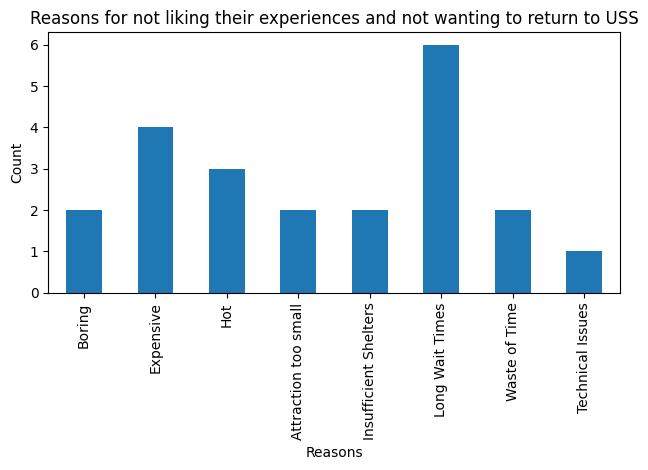

In [252]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('/Users/jamielee/Desktop/Auristone/dsa3101_project/Theme Parks Survey Responses 4 Nov.csv')

# Connect to an in-memory SQLite database
conn = sqlite3.connect(':memory:')
df.to_sql('survey_data', conn, index=False, if_exists='replace')

# SQL query to filter for "Not great" responses and categorize multiple reasons
query = """
SELECT 
    "Could you elaborate on why you would / would not visit USS again?" AS feedback,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" IS NULL THEN 'NA'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%wait%' THEN 'Long Wait Times'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%long%' THEN 'Long Wait Times'
        ELSE NULL
    END AS reason_long,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%waste%' THEN 'Waste of Time'
        ELSE NULL
    END AS reason_waste,
    CASE 
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%expensive%' THEN 'Expensive'
        ELSE NULL
    END AS reason_expensive,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%technical issues%' THEN 'Technical Issues'
        ELSE NULL
    END AS reason_technical_issues,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%boring%' THEN 'Boring'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%bored%' THEN 'Boring'
        ELSE NULL
    END AS reason_boring,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%small%' THEN 'Attraction too small'
        ELSE NULL
    END AS reason_small,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%hot%' THEN 'Hot'
        ELSE NULL
    END AS reason_hot,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%humid%' THEN 'Humid'
        ELSE NULL
    END AS reason_humid,
    CASE
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%rained%' THEN 'Insufficient Shelters'
        WHEN "Could you elaborate on why you would / would not visit USS again?" LIKE '%shelter%' THEN 'Insufficient Shelters'
        ELSE NULL
    END AS reason_lack_shelter
FROM survey_data
WHERE "Would you visit Universal Studios again?" = 'No'
    AND "How did you find your visit?" IN ('Neutral', 'Not great', 'Absolutely Terrible')
"""

# Run the query
df_dissatisfaction_multi = pd.read_sql_query(query, conn)
print(df_dissatisfaction_multi)

# Combine the reasons into a single column with multiple factors
df_dissatisfaction_multi['combined_reasons'] = df_dissatisfaction_multi[['reason_long', 'reason_waste', 'reason_expensive', 'reason_technical_issues', 'reason_boring', 'reason_small', 'reason_hot', 'reason_humid', 'reason_lack_shelter']].apply(
    lambda row: ', '.join(filter(None, row)), axis=1
)

# Remove rows where the combined_reasons column contains 'NA'
df_dissatisfaction_multi = df_dissatisfaction_multi[df_dissatisfaction_multi['combined_reasons'] != 'NA']

# Replace empty or space-only entries with 'Others'
df_dissatisfaction_multi['combined_reasons'] = df_dissatisfaction_multi['combined_reasons'].apply(lambda x: 'Others' if not x.strip() else x)

# Display the categorized responses with combined reasons
print(df_dissatisfaction_multi[['feedback', 'combined_reasons']])


# Split each entry by comma and remove whitespace
reasons_list = df_dissatisfaction_multi['combined_reasons'].dropna().apply(lambda x: x.split(', ')).sum()
print(reasons_list)
# Count each unique reason
reason_counts = Counter(reasons_list)

# Convert to DataFrame for plotting
reason_counts_df = pd.DataFrame(reason_counts.items(), columns=['Reason', 'Count'])

# Filter out 'Others' and 'NA' from the DataFrame
reason_counts_df = reason_counts_df[~reason_counts_df['Reason'].isin(['Others', 'NA'])]

# Plot the bar chart
reason_counts_df.plot(kind='bar', x='Reason', y='Count', legend=False, title='Reasons for not liking their experiences and not wanting to return to USS')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()